<a href="https://colab.research.google.com/github/NathanP23/Big-Data-Mining-52002/blob/main/MidTerm/MidTerm_52002_2024_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm 52002 - 2024-2025

**General instructions:** The mid-term should be done in pairs. Submit your solutions in the course by uploading the solution files to the course Moodle page by 10.1.2025

**.ipynb solution file:** Fill-in the missing code blocks (for parts 1 and 3)and text blocks (for all three parts) in this ipynb notebook, change the name to `MidTerm_52002_2025_25_<ID1>_<ID2>.ipynb` where replace `<ID1>` and `<ID2>` by your ID nuymbers. Run the filled-notebook it in jupyter notebooks/google colab and upload to moodle the **filled** notebook with results (tables, graphs etc.).

**In addition**, submit a pdf/html export of the executed notebook with all the output, named `MidTerm_52002_2025_25_<ID1>_<ID2>.html` (or `.pdf`). Failing to submit both files as instructed will lead to a reduction in your midtem grade.


**Good luck!**


# BigQuery & SQL - 40 points
There are 5 sub-questions in this part. Each sub-question is worth 8 points

BigQuery is Google's serverless data warehouse that enables scalable analysis   
over petabytes of data. It is a Platform as a Service (PaaS) that supports querying   
using SQL. In this part of the midterm you'll be asked to query BigQuery tables    
using its python API. Please use the `sandbox` BigQuery environment and query   
only public datasets.

**Please note:**
Your BigQuery's resources are limited to `1 TB` per user per month - be mindful with how many queries you   
execute and try to optimize your queries as much as possible.


**We will utilize two datasets about New-York City:**

The first one called `new_york_311` is the 311 calls or service requests dataset, which contains resident complaints from 2010 to 2022.

The second dataset called `new_york_trees` is the "2015 Street Tree Census - Tree Data," which includes information from the 1995, 2005, and 2015 Street Tree Censuses. This dataset catalogs trees by address and provides details such as species, diameter, and condition.

More information on the two datasets can be found [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) and [here](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data).   

**Guidelines:**  
1. Fill this notebook with python commands including SQL queries in the designated places and run it using a jupyter notebook environment (e.g. google colab)
2. Write efficient SQL queries and code. Points may be taken off for inefficient queries and code.
3. The python API enables us to write code that interacts with BigQuery and convert between the SQL tables to python objects, thus allowing analysis and plotting using python code. You should write your SQL commands within the API. It is recommended to first browse the dataset and run the SQL command manualy in the BigQuery web-browser environment, before copying it to the python notebool.      
4. Your plots should be clear, with titles, and with propoer x-y labels.
You may use the `matplotlib` library, or `pandas.DataFrame.plot` for your plots.
5. When reading BigQuery tables, used the `` symbols to around the table's name, and use as prefix `'Big Query'` and the name of the dataset. For example, to extract a table present in the `new_york_trees` dataset you should use the name
`'bigquery-public-data.new_york_trees.<table-name>'` where `<table-name>` is replaced by the name of the table.

**Necessary Libraries:**  
(Do not use any libraries that are not in this list without permission in writing form the course staff)

In [46]:
# Suppress pip output and warnings
import warnings
warnings.filterwarnings('ignore')

"""
installing packages
"""
%pip install --quiet --upgrade pip
%pip install --quiet pandas
%pip install --quiet matplotlib
%pip install --quiet google-cloud-bigquery
%pip install --quiet altair
%pip install --quiet vl-convert-python
%pip install --quiet networkx
%pip install --quiet geopy
%pip install --quiet scipy
%pip install --quiet scikit-learn
import altair as alt
alt.renderers.enable('png')

"""
installing packages for VScode
"""
%pip install --quiet google-cloud-storage
%pip install --quiet db-dtypes


"""
Global Variables
"""
global_project_id = "big-data-mining-52002-midterm"
global_chart_width = 850
global_chart_height = 150

In [47]:
import pandas as pd
import matplotlib as plt
from google.cloud import bigquery
from sqlite3 import connect

### Q1: BigQuery client & Initital Query

In [48]:
"""
Use for google-colab:
"""
from google.colab import auth
auth.authenticate_user()


"""
Use for VScode:

from google.cloud import storage

def authenticate_implicit_with_adc(project_id=global_project_id):

    When interacting with Google Cloud Client libraries, the library can auto-detect the
    credentials to use.

    // TODO(Developer):
    //  1. Before running this sample,
    //  set up ADC as described in https://cloud.google.com/docs/authentication/external/set-up-adc
    //  2. Replace the project variable.
    //  3. Make sure that the user account or service account that you are using
    //  has the required permissions. For this sample, you must have "storage.buckets.list".
    Args:
        project_id: The project id of your Google Cloud project.


    # This snippet demonstrates how to list buckets.
    # *NOTE*: Replace the client created below with the client required for your application.
    # Note that the credentials are not specified when constructing the client.
    # Hence, the client library will look for credentials using ADC.
    storage_client = storage.Client(project=project_id)
    buckets = storage_client.list_buckets()
    print("Buckets:")
    for bucket in buckets:
        print(bucket.name)
    print("Listed all storage buckets.")
"""
print('Authenticated')

Authenticated


Construct a BigQuery client object using the `client` method of the `bigquery` module.  The project name you use here should match the name of the project you open in the BigQuery environment. You should use in both places the same **non-huji** google user name

In [49]:
client = bigquery.Client(project=global_project_id)

Make a simple query displaying five columns of your choice from one of the tables of your choice in the two datasetsin order to check the connection. Limit the number of rows in the displayed output to 10

In [50]:
# Define the SQL query to select specific columns from the tree census dataset
my_query = """
SELECT
    block_id,     -- Unique identifier for each block
    tree_id,      -- Unique identifier for each tree
    created_at,   -- Date when the record was created
    tree_dbh,     -- Diameter at breast height of the tree
    status        -- Current status of the tree (e.g., Alive, Dead, Stump)
FROM `bigquery-public-data.new_york_trees.tree_census_2015`  -- Source table containing 2015 tree census data
LIMIT 10          -- Limit results to first 10 records for initial inspection
"""

# Execute the query using the BigQuery client
query_job = client.query(my_query)  # Make an API request to BigQuery

# Retrieve the results and convert them to a pandas DataFrame
results = query_job.result().to_dataframe()  # Convert query results to DataFrame format

# Display the first 10 rows of the DataFrame
results.head(10)  # Show the retrieved data in tabular format

,block_id,tree_id,created_at,tree_dbh,status
0,502982,80548,2015-07-20,0,Stump
1,503216,449489,2015-11-12,0,Stump
2,503196,449293,2015-11-12,0,Stump
3,503188,449153,2015-11-12,0,Stump
4,503152,449148,2015-11-12,0,Stump
5,503778,68192,2015-07-15,0,Stump
6,503349,68347,2015-07-15,0,Stump
7,503884,68393,2015-07-15,0,Stump
8,503258,324827,2015-10-14,0,Stump
9,503263,325180,2015-10-14,0,Stump


#### Q1 Explanations

---

**Answer**  
The code successfully establishes a connection to Google Cloud's BigQuery service, authenticates using the provided credentials, and executes a query on a public dataset (`bigquery-public-data.new_york_trees.tree_census_2015`). The query retrieves five columns (`block_id`, `tree_id`, `created_at`, `tree_dbh`, and `status`) from the dataset, limiting the output to 10 rows. The resulting DataFrame is displayed, confirming that the connection and query execution were successful. The output shows tree data with a focus on tree IDs, their locations, creation dates, diameters, and status.

---

**Code Explanation**

1. **Authentication**  
   ```python
   from google.cloud import storage
   storage_client = storage.Client(project=project_id)
   buckets = storage_client.list_buckets()
   ```
   - `from google.cloud import storage`: Imports the Google Cloud Storage library.  
   - `storage.Client(project=project_id)`: Creates a client object for interacting with Google Cloud Storage using the specified project ID.  
   - `list_buckets()`: Lists all storage buckets in the specified project.  
   - The authentication process ensures the connection to Google Cloud is valid.

2. **BigQuery Client Initialization**  
   ```python
   client = bigquery.Client(project=global_project_id)
   ```
   - `bigquery.Client()`: Initializes a BigQuery client object for interacting with Google Cloud's BigQuery service.  
   - `project=global_project_id`: Specifies the project in Google Cloud where the datasets are stored.

3. **Query Execution**  
   ```python
   my_query = """
   SELECT block_id, tree_id, created_at, tree_dbh, status
   FROM `bigquery-public-data.new_york_trees.tree_census_2015`
   LIMIT 10
   """
   query_job = client.query(my_query)  # Make an API request
   results = query_job.result().to_dataframe()  # Convert results to a pandas DataFrame
   results.head(10)
   ```
   - The SQL query selects five columns from the dataset and limits the output to 10 rows.  
   - `client.query(my_query)`: Sends the query to BigQuery and retrieves the results.  
   - `query_job.result().to_dataframe()`: Converts the results into a Pandas DataFrame for easy display and further analysis.  
   - `results.head(10)`: Displays the first 10 rows of the DataFrame.

---

**Summary**  
This setup and query process confirms that the connection works, data is accessible, and query results are correctly returned as a DataFrame.

### Q2: Exploratory Data Analysis
**Remark:** unless specified otherwise, refer to the following dataset when considering data for trees:
`'bigquery-public-data.new_york_trees.tree_census_2015'`

#### Q2a
How many trees were there in New York in 2015, and how many of these were healthy (whose health status is not `Poor` or `null`)?

In [51]:
# 2a)
# Define the SQL query to count the total number of trees and healthy trees
query2a = """
SELECT
  COUNT(*) AS total_trees,                                             -- Count all trees
  COUNTIF(health != 'Poor' AND health IS NOT NULL) AS healthy_trees    -- Count healthy trees
FROM `bigquery-public-data.new_york_trees.tree_census_2015`            -- Tree census data from 2015
"""

# Execute the query using the BigQuery client and make API request
query_job2a = client.query(query2a)

# Convert results to pandas DataFrame for easier manipulation
df2a = pd.DataFrame(query_job2a.result().to_dataframe())

# Display the first few rows of the results
df2a.head()

,total_trees,healthy_trees
0,683788,625354


##### Q2a Explanations

---

**Answer**  
The query results show that in 2015, there were **683,788** trees in New York. Of these, **625,354** trees were considered healthy, where "healthy" means the trees' health status is neither `Poor` nor `null`.

---

**Code Explanation**

1. **SQL Query**  
   ```python
   query2a = """
   SELECT
     COUNT(*) AS total_trees,
     COUNTIF(health != 'Poor' AND health IS NOT NULL) AS healthy_trees
   FROM `bigquery-public-data.new_york_trees.tree_census_2015`
   """
   ```
   - `SELECT`: Specifies what data to retrieve.
   - `COUNT(*) AS total_trees`: Counts the total number of rows (trees) in the dataset, which represents all trees in New York in 2015.
   - `COUNTIF(health != 'Poor' AND health IS NOT NULL) AS healthy_trees`: Counts the trees where the `health` status is not `'Poor'` and is not `NULL`. This gives the number of healthy trees.
   - `FROM 'bigquery-public-data.new_york_trees.tree_census_2015'`: The dataset being queried.

2. **Running the Query**  
   ```python
   query_job2a = client.query(query2a)  # Make an API request.
   ```
   - This sends the query to BigQuery and initiates the request to retrieve the data.

3. **Converting Results to DataFrame**  
   ```python
   df2a = pd.DataFrame(query_job2a.result().to_dataframe())
   df2a.head()
   ```
   - `query_job2a.result().to_dataframe()`: Converts the query results into a Pandas DataFrame for easy manipulation and display.
   - `df2a.head()`: Displays the first few rows (in this case, just one row since it's an aggregation) of the DataFrame.

---

**Summary**  
This query is an example of simple aggregation using `COUNT` and `COUNTIF` in BigQuery to answer key questions about the dataset. The results show the total number of trees and the number of trees in a healthy state based on the specified health conditions.

#### Q2b
What are the ten most common tree species in New York?  Run a query that returns a table with the number of trees for each species, the number of healthy trees and the percentage of healthy trees within each species (relative to the total trees of that species).
Display the output table with these details only for the ten species with the highest overall counts.

In [52]:
# 2b)
# Define the SQL query to select the top 10 most common tree species
# and calculate the total number of trees, number of healthy trees,
# and the percentage of healthy trees for each species
query2b = """
SELECT
  spc_common AS species,
  COUNT(*) AS total_trees,
  COUNTIF(health != 'Poor' AND health IS NOT NULL) AS healthy_trees,
  ROUND(COUNTIF(health != 'Poor' AND health IS NOT NULL) / COUNT(*) * 100, 2) AS healthy_percentage
FROM `bigquery-public-data.new_york_trees.tree_census_2015`
WHERE spc_common IS NOT NULL
GROUP BY species
ORDER BY total_trees DESC
LIMIT 10
"""

# Execute the query using the BigQuery client
query_job2b = client.query(query2b)  # Make an API request.

# Retrieve the results and convert them to a pandas DataFrame
df2b = pd.DataFrame(query_job2b.result().to_dataframe())

# Display the first 10 rows of the DataFrame
df2b.head(10)

,species,total_trees,healthy_trees,healthy_percentage
0,London planetree,87014,84816,97.47
1,honeylocust,64264,63073,98.15
2,Callery pear,58931,56842,96.46
3,pin oak,53185,51950,97.68
4,Norway maple,34189,30410,88.95
5,littleleaf linden,29742,28022,94.22
6,cherry,29279,27974,95.54
7,Japanese zelkova,29258,28476,97.33
8,ginkgo,21024,19906,94.68
9,Sophora,19338,18722,96.81


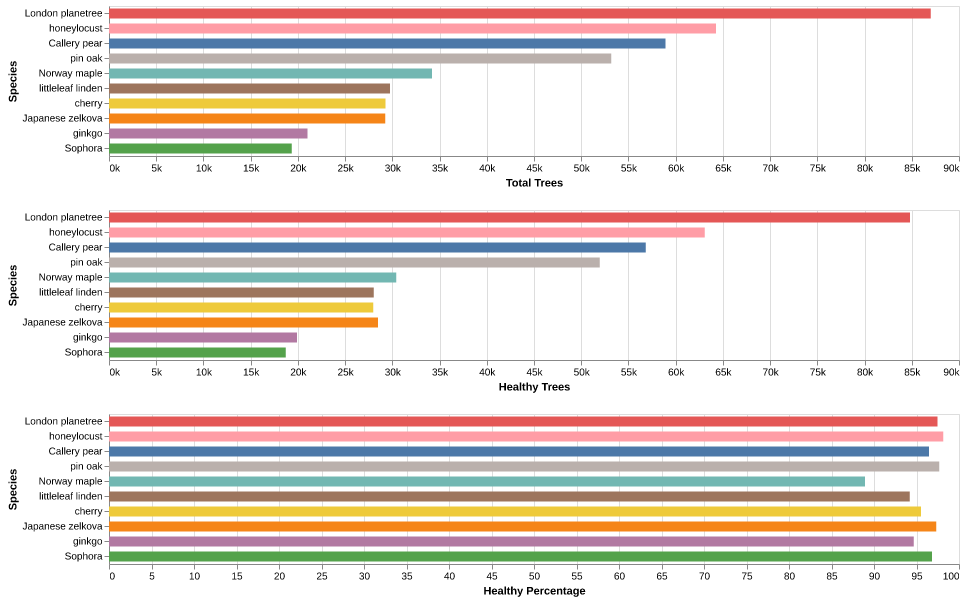

In [53]:
# Chart 1: Total Trees (Defines the sorting order)
chart1 = alt.Chart(df2b.head(10)).mark_bar(size=10).encode(
    x=alt.X("total_trees:Q", title="Total Trees", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort="-x"),  # Sort by total_trees
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "total_trees"]
).properties(
    width=global_chart_width,
    height=global_chart_height,
)

# Chart 2: Healthy Trees (Use the same sorting as chart1)
chart2 = alt.Chart(df2b.head(10)).mark_bar(size=10).encode(
    x=alt.X("healthy_trees:Q", title="Healthy Trees", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "healthy_trees"]
).properties(
    width=global_chart_width,
    height=global_chart_height,
)

# Chart 3: Healthy Percentage (Use the same sorting as chart1)
chart3 = alt.Chart(df2b.head(10)).mark_bar(size=10).encode(
    x=alt.X("healthy_percentage:Q", title="Healthy Percentage", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "healthy_percentage"]
).properties(
    width=global_chart_width,
    height=global_chart_height,
)

# Combine charts vertically
chart1 & chart2 & chart3

##### Q2b Explanations

---

**Answer**  
The query results show the ten most common tree species in New York, along with the following details for each species:

1. **Species Name**  
2. **Total Trees**: The number of trees of that species.  
3. **Healthy Trees**: The number of trees that are considered healthy (i.e., their health status is neither "Poor" nor `null`).  
4. **Healthy Percentage**: The percentage of healthy trees relative to the total trees of that species.

---

**Code Explanation**

1. **SQL Query**  
   ```python
   query2b = """
   SELECT
     spc_common AS species,
     COUNT(*) AS total_trees,
     COUNTIF(health != 'Poor' AND health IS NOT NULL) AS healthy_trees,
     ROUND(COUNTIF(health != 'Poor' AND health IS NOT NULL) / COUNT(*) * 100, 2) AS healthy_percentage
   FROM `bigquery-public-data.new_york_trees.tree_census_2015`
   WHERE spc_common IS NOT NULL
   GROUP BY species
   ORDER BY total_trees DESC
   LIMIT 10
   """
   ```
   - `SELECT`: Specifies the columns to retrieve.
   - `spc_common AS species`: Retrieves the tree species (`spc_common`) and renames it to `species`.
   - `COUNT(*) AS total_trees`: Counts the total number of trees for each species.
   - `COUNTIF(health != 'Poor' AND health IS NOT NULL) AS healthy_trees`: Counts the number of healthy trees where the `health` status is neither `'Poor'` nor `NULL`.
   - `ROUND(COUNTIF(...) / COUNT(*) * 100, 2) AS healthy_percentage`: Calculates the percentage of healthy trees relative to total trees of that species and rounds it to 2 decimal places.
   - `FROM bigquery-public-data.new_york_trees.tree_census_2015`: Specifies the dataset being queried.
   - `WHERE spc_common IS NOT NULL`: Filters out rows where the species is missing (`NULL`).
   - `GROUP BY species`: Groups the results by species.
   - `ORDER BY total_trees DESC`: Orders the species by the total number of trees in descending order (highest to lowest).
   - `LIMIT 10`: Limits the result to the top 10 species with the highest counts.

2. **Running the Query**  
   ```python
   query_job2b = client.query(query2b)  # Make an API request.
   ```
   - This sends the query to BigQuery and starts the request to retrieve the data.

3. **Converting Results to DataFrame**  
   ```python
   df2b = pd.DataFrame(query_job2b.result().to_dataframe())
   df2b.head(10)
   ```
   - `query_job2b.result().to_dataframe()`: Converts the results from the query into a Pandas DataFrame for easier manipulation.
   - `df2b.head(10)`: Displays the first 10 rows of the DataFrame (which are the top 10 species with the highest total tree counts).

---

**Summary**  
This query uses `COUNT`, `COUNTIF`, and `ROUND` functions in SQL to calculate and display the total number of trees, the number of healthy trees, and the percentage of healthy trees for each species. The top 10 species are returned based on their total tree counts in descending order.

#### Q2c
Analyze the status distribution of New York City's trees by examining each ZIP code area. Your analysis should reveal the total number of trees per ZIP code along with the percentage of trees in each of the health status categories within each ZIP code. Exclude records with missing data (`zipcode` or `status`) . Show a table with the results for the five ZIP codes with the highest number of total trees.

In [54]:
# 2c)
query2c = """
SELECT
  zipcode,
  COUNT(*) AS total_trees,                                               -- Count total trees per ZIP code
  ROUND(COUNTIF(health = 'Good') / COUNT(*) * 100, 2) AS good_percentage,-- Calculate % of Good trees
  ROUND(COUNTIF(health = 'Fair') / COUNT(*) * 100, 2) AS fair_percentage,-- Calculate % of Fair trees
  ROUND(COUNTIF(health = 'Poor') / COUNT(*) * 100, 2) AS poor_percentage -- Calculate % of Poor trees
FROM `bigquery-public-data.new_york_trees.tree_census_2015`              -- Source: 2015 tree census data
WHERE zipcode IS NOT NULL
  AND status IS NOT NULL                                                 -- Filter out missing data
GROUP BY zipcode                                                         -- Group results by ZIP code
ORDER BY total_trees DESC                                                -- Sort by most trees first
LIMIT 5                                                                  -- Show top 5 ZIP codes
"""

query_job2c = client.query(query2c)                                      # Send query to BigQuery
df2c = query_job2c.result().to_dataframe()                               # Convert results to DataFrame

df2c.head()                                                              # Show first 5 rows of results

,zipcode,total_trees,good_percentage,fair_percentage,poor_percentage
0,10312,22186,75.23,16.20,4.83
1,10314,16905,78.84,13.84,3.92
2,10306,13030,80.17,13.82,2.83
3,10309,12650,78.17,12.83,4.69
4,11234,11253,82.00,11.29,3.03


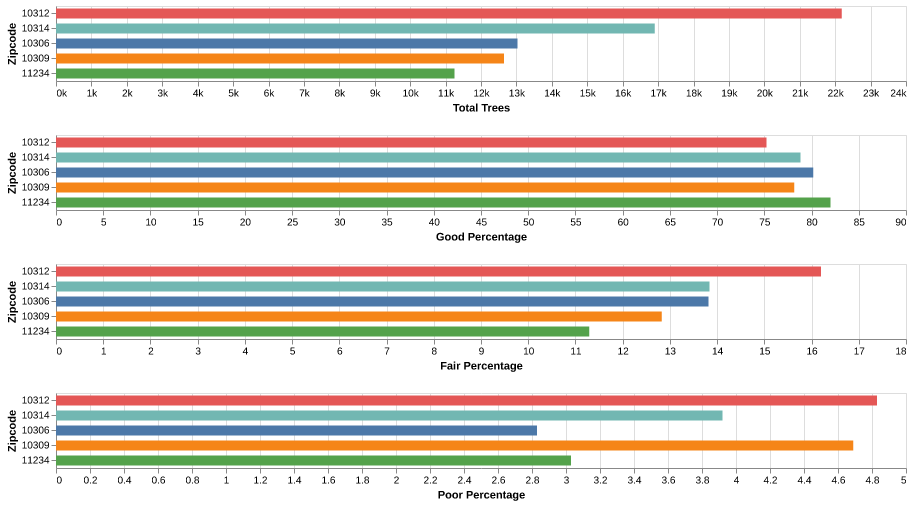

In [55]:
# Chart 1: Total Trees (Defines the sorting order)
chart1 = alt.Chart(df2c.head()).mark_bar(size=10).encode(
    x=alt.X("total_trees:Q", title="Total Trees", axis=alt.Axis(format="~s")),
    y=alt.Y("zipcode:N", title="Zipcode", sort="-x"),  # Sort by total_trees
    color=alt.Color("zipcode:N", legend=None),
    tooltip=["zipcode", "total_trees"]
).properties(
    width=global_chart_width,
    height=0.5*global_chart_height,
)

# Chart 2: Good Percentage (Use the same sorting as chart1)
chart2 = alt.Chart(df2c.head()).mark_bar(size=10).encode(
    x=alt.X("good_percentage:Q", title="Good Percentage", axis=alt.Axis(format="~s")),
    y=alt.Y("zipcode:N", title="Zipcode", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("zipcode:N", legend=None),
    tooltip=["zipcode", "good_percentage"]
).properties(
    width=global_chart_width,
    height=0.5*global_chart_height,
)

# Chart 3: Fair Percentage (Use the same sorting as chart1)
chart3 = alt.Chart(df2c.head()).mark_bar(size=10).encode(
    x=alt.X("fair_percentage:Q", title="Fair Percentage", axis=alt.Axis(format="~s")),
    y=alt.Y("zipcode:N", title="Zipcode", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("zipcode:N", legend=None),
    tooltip=["zipcode", "fair_percentage"]
).properties(
    width=global_chart_width,
    height=0.5*global_chart_height,
)

# Chart 4: Poor Percentage (Use the same sorting as chart1)
chart4 = alt.Chart(df2c.head()).mark_bar(size=10).encode(
    x=alt.X("poor_percentage:Q", title="Poor Percentage", axis=alt.Axis(format="~s")),
    y=alt.Y("zipcode:N", title="Zipcode", sort=alt.EncodingSortField(field="total_trees", order="descending")),
    color=alt.Color("zipcode:N", legend=None),
    tooltip=["zipcode", "poor_percentage"]
).properties(
    width=global_chart_width,
    height=0.5*global_chart_height,
)

# Combine charts vertically
chart1 & chart2 & chart3 & chart4

##### Q2c Explanations

---

**Answer**  
The query provides an analysis of tree health status distribution in New York City, broken down by ZIP code. It shows the following details for the five ZIP codes with the highest number of trees:

- **ZIP Code**: The postal code of the area.
- **Total Trees**: The total number of trees in that ZIP code.
- **Good Percentage**: The percentage of trees in that ZIP code with a health status of 'Good'.
- **Fair Percentage**: The percentage of trees in that ZIP code with a health status of 'Fair'.
- **Poor Percentage**: The percentage of trees in that ZIP code with a health status of 'Poor'.

This analysis reveals the overall tree health in the top five ZIP codes by providing a breakdown of how trees are categorized into `Good`, `Fair`, and `Poor` health.

---

**Code Explanation**

1. **SQL Query**  
   ```python
   query2c = """
   SELECT
     zipcode,
     COUNT(*) AS total_trees,
     ROUND(COUNTIF(health = 'Good') / COUNT(*) * 100, 2) AS good_percentage,
     ROUND(COUNTIF(health = 'Fair') / COUNT(*) * 100, 2) AS fair_percentage,
     ROUND(COUNTIF(health = 'Poor') / COUNT(*) * 100, 2) AS poor_percentage
   FROM `bigquery-public-data.new_york_trees.tree_census_2015`
   WHERE zipcode IS NOT NULL AND status IS NOT NULL
   GROUP BY zipcode
   ORDER BY total_trees DESC
   LIMIT 5
   """
   ```
   - `SELECT`: Specifies which data columns to retrieve.
   - `zipcode`: Retrieves the ZIP code for grouping.
   - `COUNT(*) AS total_trees`: Counts the total number of trees in each ZIP code.
   - `COUNTIF(health = 'Good') / COUNT(*) * 100 AS good_percentage`: Calculates the percentage of trees in 'Good' health within each ZIP code.
   - `COUNTIF(health = 'Fair') / COUNT(*) * 100 AS fair_percentage`: Calculates the percentage of trees in 'Fair' health within each ZIP code.
   - `COUNTIF(health = 'Poor') / COUNT(*) * 100 AS poor_percentage`: Calculates the percentage of trees in 'Poor' health within each ZIP code.
   - `FROM bigquery-public-data.new_york_trees.tree_census_2015`: Specifies the dataset being queried.
   - `WHERE zipcode IS NOT NULL AND status IS NOT NULL`: Filters out rows where the `zipcode` or `status` is missing (`NULL`).
   - `GROUP BY zipcode`: Groups the results by ZIP code.
   - `ORDER BY total_trees DESC`: Orders the results by the total number of trees in descending order.
   - `LIMIT 5`: Limits the result to the top 5 ZIP codes with the highest number of trees.

2. **Running the Query**  
   ```python
   query_job2c = client.query(query2c)  # Execute the query
   ```
   - This sends the query to BigQuery and begins the request to retrieve the data.

3. **Converting Results to DataFrame**  
   ```python
   df2c = query_job2c.result().to_dataframe()
   df2c.head()
   ```
   - `query_job2c.result().to_dataframe()`: Converts the query results into a Pandas DataFrame for easy manipulation and display.
   - `df2c.head()`: Displays the first 5 rows of the resulting DataFrame, which corresponds to the top 5 ZIP codes.

---

**Summary**  
This query aggregates tree data by ZIP code, providing insights into the health status distribution of trees in New York City's most tree-dense areas. It calculates the percentage of healthy trees in each health status category (`Good`, `Fair`, `Poor`) and displays the results for the five ZIP codes with the highest total tree counts.

### Q3: Changes Over Time

#### Q3a
Write a query that extracts for each tree species the change in the the number of trees in New York State from 1995 to 2015, using the dataset `'bigquery-public-data.new_york_trees.tree_census_1995'` in addition to `'bigquery-public-data.new_york_trees.tree_census_2015'`. Sort the resulting list by the absolute value of the change in the number of trees, and display the five species with the highest absolute change in the number of trees. Show the number of trees in 1995, in 2015 and the change for these species. Since the names sometimes differ between the years, use the uppercase version of `spc_latin` for each year. Then, merge the data using a `CROSS JOIN`, with the condition that the [`EDIT_DISTANCE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/string_functions#edit_distance) between the names is less than or equal to 2.

In [56]:
# 3a)
query3a = """
WITH census_1995 AS (
  -- Select species and count trees in 1995
  SELECT
    UPPER(spc_latin) AS species_1995,                             -- Convert species name to uppercase for 1995
    COUNT(*) AS trees_1995                                        -- Count trees for each species in 1995
  FROM `bigquery-public-data.new_york_trees.tree_census_1995`
  GROUP BY species_1995                                           -- Group results by species name
),
census_2015 AS (
  SELECT                                                          -- Select species and count trees in 2015
    UPPER(spc_latin) AS species_2015,                             -- Convert species name to uppercase for 2015
    COUNT(*) AS trees_2015                                        -- Count trees for each species in 2015
  FROM `bigquery-public-data.new_york_trees.tree_census_2015`
  GROUP BY species_2015                                           -- Group results by species name
)
SELECT
  c1995.species_1995 AS species,                                  -- Select species name from 1995
  c1995.trees_1995,                                               -- Number of trees in 1995
  c2015.trees_2015,                                               -- Number of trees in 2015
  ABS(c1995.trees_1995 - c2015.trees_2015)
    AS change_in_trees                                            -- Absolute change in number of trees
FROM census_1995 c1995
CROSS JOIN census_2015 c2015                                      -- Match all species combinations
WHERE EDIT_DISTANCE(c1995.species_1995, c2015.species_2015) <= 2  -- Match species names with edit distance <= 2
ORDER BY change_in_trees DESC                                     -- Sort by absolute change in descending order
LIMIT 5                                                           -- Return top 5 species with highest change
"""

# Execute the query
query_job3a = client.query(query3a)                               # Send query to BigQuery
df3a = query_job3a.result().to_dataframe()                        # Convert results to pandas DataFrame

# Display the results
df3a.head()                                                       # Show first 5 rows of the DataFrame

,species,trees_1995,trees_2015,change_in_trees
0,ACER PLATANOIDES,109325,34189,75136
1,PYRUS CALLERYANA,31295,58931,27636
2,ZELKOVA SERRATA,5740,29258,23518
3,ACER SACCHARINUM,22347,2844,19503
4,QUERCUS PALUSTRIS,36553,53185,16632


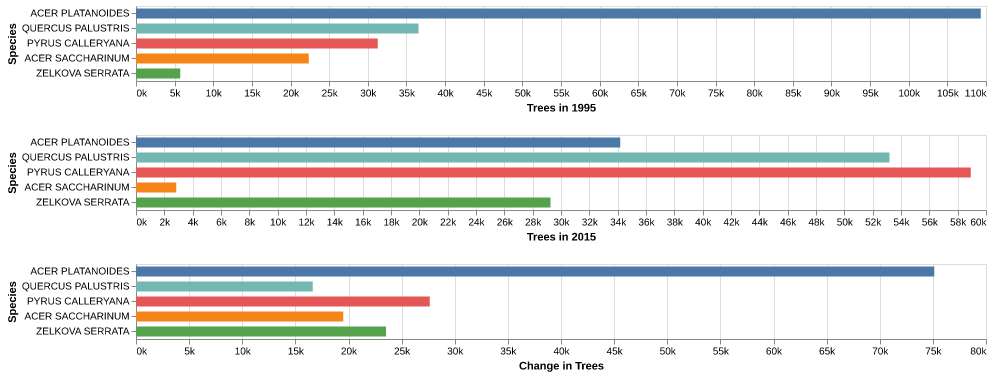

In [57]:
# Chart 1: Trees in 1995
chart1 = alt.Chart(df3a.head()).mark_bar(size=10).encode(
    x=alt.X("trees_1995:Q", title="Trees in 1995", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort="-x"),  # Sort by trees_1995
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "trees_1995"]
).properties(
    width=global_chart_width,
    height=0.5*global_chart_height,
)

# Chart 2: Trees in 2015
chart2 = alt.Chart(df3a.head()).mark_bar(size=10).encode(
    x=alt.X("trees_2015:Q", title="Trees in 2015", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort=alt.EncodingSortField(field="trees_1995", order="descending")),
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "trees_2015"]
).properties(
    width=global_chart_width,
    height=0.5*global_chart_height,
)

# Chart 3: Change in Trees
chart3 = alt.Chart(df3a.head()).mark_bar(size=10).encode(
    x=alt.X("change_in_trees:Q", title="Change in Trees", axis=alt.Axis(format="~s")),
    y=alt.Y("species:N", title="Species", sort=alt.EncodingSortField(field="trees_1995", order="descending")),
    color=alt.Color("species:N", legend=None),
    tooltip=["species", "change_in_trees"]
).properties(
    width=global_chart_width,
    height=0.5*global_chart_height,
)

# Combine the charts vertically
chart1 & chart2 & chart3

##### Q3a Explanation

---

**Answer**  
The query provides the change in the number of trees for each tree species in New York State from 1995 to 2015, focusing on the five species with the highest absolute changes in the number of trees.

These results show the following:
- The species with the largest decline is *Acer platanoides* with a decrease of 75,136 trees.
- The species with the largest increase is *Pyrus calleryana* with an increase of 27,636 trees.

The `EDIT_DISTANCE` function is used to account for slight differences in species names between the two census years, allowing the matching of similar names.

---

**Code Explanation**

1. **Common Table Expressions (CTEs)**  
   ```python
   WITH census_1995 AS (
     SELECT
       UPPER(spc_latin) AS species_1995,
       COUNT(*) AS trees_1995
     FROM `bigquery-public-data.new_york_trees.tree_census_1995`
     GROUP BY species_1995
   ),
   census_2015 AS (
     SELECT
       UPPER(spc_latin) AS species_2015,
       COUNT(*) AS trees_2015
     FROM `bigquery-public-data.new_york_trees.tree_census_2015`
     GROUP BY species_2015
   )
   ```
   - **CTE for 1995 (`census_1995`)**:
     - `UPPER(spc_latin) AS species_1995`: Converts species names to uppercase for standardization, so that names match between years.
     - `COUNT(*) AS trees_1995`: Counts the number of trees for each species in 1995.
     - `GROUP BY species_1995`: Groups the data by species.
   
   - **CTE for 2015 (`census_2015`)**:
     - This section mirrors the 1995 query, counting the number of trees for each species in 2015.
   
2. **Main Query and `CROSS JOIN`**  
   ```python
   SELECT
     c1995.species_1995 AS species,
     c1995.trees_1995,
     c2015.trees_2015,
     ABS(c1995.trees_1995 - c2015.trees_2015) AS change_in_trees
   FROM census_1995 c1995
   CROSS JOIN census_2015 c2015
   WHERE EDIT_DISTANCE(c1995.species_1995, c2015.species_2015) <= 2
   ORDER BY change_in_trees DESC
   LIMIT 5
   ```
   - `CROSS JOIN`: Combines every row from the `census_1995` CTE with every row from the `census_2015` CTE, allowing species to be compared across both years.
   - `EDIT_DISTANCE(c1995.species_1995, c2015.species_2015) <= 2`: Compares the species names using the `EDIT_DISTANCE` function, which returns the number of character changes needed to convert one string to another. A threshold of `<= 2` ensures that names differing by minor spelling variations or typographical errors are matched.
   - `ABS(c1995.trees_1995 - c2015.trees_2015) AS change_in_trees`: Calculates the absolute change in the number of trees for each species.
   - `ORDER BY change_in_trees DESC`: Orders the results by the absolute value of the change in descending order (highest change first).
   - `LIMIT 5`: Limits the results to the five species with the highest absolute change in the number of trees.

3. **Executing the Query**  
   ```python
   query_job3a = client.query(query3a)
   df3a = query_job3a.result().to_dataframe()
   ```
   - `client.query(query3a)`: Executes the query against BigQuery.
   - `.result().to_dataframe()`: Converts the query result into a Pandas DataFrame for easier manipulation and display.

4. **Displaying the Results**  
   ```python
   df3a.head()
   ```
   - `df3a.head()`: Displays the first 5 rows of the resulting DataFrame, corresponding to the species with the highest absolute change in the number of trees.

---

**Summary**  
This query compares tree census data from 1995 and 2015 by species. It calculates the absolute change in tree numbers and shows the five species with the highest change, using `CROSS JOIN` and `EDIT_DISTANCE` to match species with minor differences in naming.

#### Q3b
Compare the percentage trees of each fall foliage color for the years 1995 and 2015 separately using the `bigquery-public-data.new_york_trees.tree_species` dataset. If a tree species is not found in the dataset, assume its foliage color is "Unknown." Output a table showing for each fall foilage color the percent of trees in 1995, the percent of trees in 2015 and their difference, sorted by the aboslute value of the difference.
Use the same criteria for `CROSS JOIN` as in 3a. ('EDIT_DISTANCE' at most 2 for the uppercase names).

*Remark:* Consider each combination of colors (e.g. `Red/Bronze`) as a color of its own (different from the colors `Red` or `Bronze` in this example).

In [58]:
# 3b)
query3b = """
WITH tree_species AS (
  -- Select species and their fall foliage color from the tree_species dataset
  SELECT
    UPPER(species_scientific_name) AS species,  -- Convert species name to uppercase for consistency
    fall_color AS foliage_color                 -- Select fall foliage color
  FROM `bigquery-public-data.new_york_trees.tree_species`
),
census_1995 AS (
  -- Select species and count trees in 1995
  SELECT
    UPPER(spc_latin) AS species_1995,           -- Convert species name to uppercase for consistency
    COUNT(*) AS trees_1995                      -- Count trees for each species in 1995
  FROM `bigquery-public-data.new_york_trees.tree_census_1995`
  GROUP BY species_1995                         -- Group results by species name
),
census_2015 AS (
  -- Select species and count trees in 2015
  SELECT
    UPPER(spc_latin) AS species_2015,           -- Convert species name to uppercase for consistency
    COUNT(*) AS trees_2015                      -- Count trees for each species in 2015
  FROM `bigquery-public-data.new_york_trees.tree_census_2015`
  GROUP BY species_2015                         -- Group results by species name
),
merged_1995 AS (
  -- Merge 1995 census data with tree species data
  SELECT
    COALESCE(ts.foliage_color, "Unknown") AS foliage_color,  -- Use "Unknown" if foliage color is missing
    SUM(c1995.trees_1995) AS total_trees_1995                -- Sum the number of trees for each foliage color in 1995
  FROM census_1995 c1995
  LEFT JOIN tree_species ts
    ON EDIT_DISTANCE(c1995.species_1995, ts.species) <= 2    -- Match species names with edit distance <= 2
  GROUP BY foliage_color                                     -- Group results by foliage color
),
merged_2015 AS (
  -- Merge 2015 census data with tree species data
  SELECT
    COALESCE(ts.foliage_color, "Unknown") AS foliage_color,  -- Use "Unknown" if foliage color is missing
    SUM(c2015.trees_2015) AS total_trees_2015                -- Sum the number of trees for each foliage color in 2015
  FROM census_2015 c2015
  LEFT JOIN tree_species ts
    ON EDIT_DISTANCE(c2015.species_2015, ts.species) <= 2    -- Match species names with edit distance <= 2
  GROUP BY foliage_color                                     -- Group results by foliage color
),
percentages AS (
  -- Calculate the percentage of trees for each foliage color in 1995 and 2015
  SELECT
    COALESCE(m1995.foliage_color, m2015.foliage_color) AS foliage_color,  -- Combine foliage colors from both years
    ROUND(SAFE_DIVIDE(m1995.total_trees_1995, SUM(m1995.total_trees_1995) OVER()) * 100, 2) AS percent_1995,  -- Calculate percentage for 1995
    ROUND(SAFE_DIVIDE(m2015.total_trees_2015, SUM(m2015.total_trees_2015) OVER()) * 100, 2) AS percent_2015   -- Calculate percentage for 2015
  FROM merged_1995 m1995
  FULL OUTER JOIN merged_2015 m2015
    ON m1995.foliage_color = m2015.foliage_color  -- Join on foliage color
)
-- Select foliage color, percentages for 1995 and 2015, and their difference
SELECT
  foliage_color,
  percent_1995,
  percent_2015,
  ROUND(ABS(percent_1995 - percent_2015), 2) AS percent_difference  -- Calculate the absolute difference in percentages
FROM percentages
ORDER BY percent_difference DESC  -- Order by the absolute difference in descending order
"""

# Execute the query
query_job3b = client.query(query3b)  # Send query to BigQuery
df3b = query_job3b.result().to_dataframe()  # Convert results to pandas DataFrame

# Display the results
df3b.head(10)  # Show first few rows of the DataFrame


,foliage_color,percent_1995,percent_2015,percent_difference
0,Unknown,48.67,25.25,23.42
1,Yellow,31.74,44.54,12.80
2,Maroon,14.43,18.63,4.20
3,Red/Bronze,1.11,4.28,3.17
4,Red,3.64,2.86,0.78
5,Orange/Brown,0.00,0.63,0.63
6,Yellow/Orange,0.38,0.82,0.44
7,Purple/Maroon,0.01,0.16,0.15
8,Cream,NaN,2.83,NaN


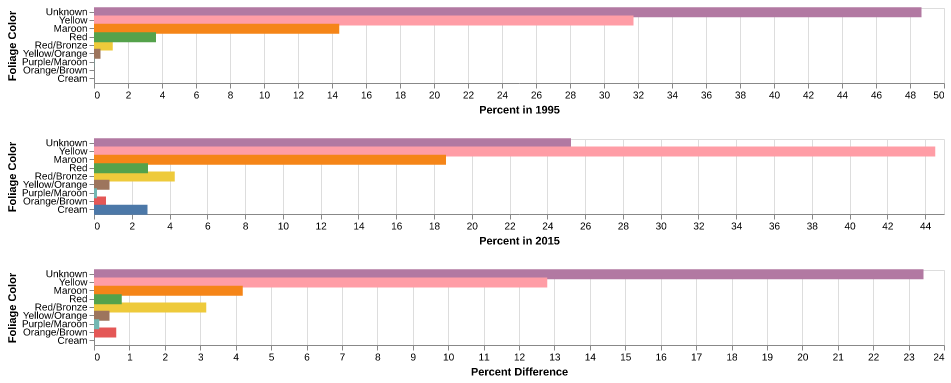

In [59]:
# Chart 1: Percent in 1995
chart1 = alt.Chart(df3b.head(10)).mark_bar(size=10).encode(
    x=alt.X("percent_1995:Q", title="Percent in 1995", axis=alt.Axis(format="~s")),
    y=alt.Y("foliage_color:N", title="Foliage Color", sort="-x"),  # Sort by percent_1995
    color=alt.Color("foliage_color:N", legend=None),
    tooltip=["foliage_color", "percent_1995"]
).properties(
    width=global_chart_width,
    height=global_chart_height,
)

# Chart 2: Percent in 2015
chart2 = alt.Chart(df3b.head(10)).mark_bar(size=10).encode(
    x=alt.X("percent_2015:Q", title="Percent in 2015", axis=alt.Axis(format="~s")),
    y=alt.Y("foliage_color:N", title="Foliage Color", sort=alt.EncodingSortField(field="percent_1995", order="descending")),
    color=alt.Color("foliage_color:N", legend=None),
    tooltip=["foliage_color", "percent_2015"]
).properties(
    width=global_chart_width,
    height=global_chart_height,
)

# Chart 3: Percent Difference
chart3 = alt.Chart(df3b.head(10)).mark_bar(size=10).encode(
    x=alt.X("percent_difference:Q", title="Percent Difference", axis=alt.Axis(format="~s")),
    y=alt.Y("foliage_color:N", title="Foliage Color", sort=alt.EncodingSortField(field="percent_1995", order="descending")),
    color=alt.Color("foliage_color:N", legend=None),
    tooltip=["foliage_color", "percent_difference"]
).properties(
    width=global_chart_width,
    height=global_chart_height,
)

# Combine the charts vertically
chart1 & chart2 & chart3


##### Q3b Explanations

---

**Answer**  
The query compares the percentage of trees for each fall foliage color in New York State in 1995 and 2015, calculating the difference in percentage for each color. The table shows the following results, sorted by the absolute value of the percentage difference.

Observations:
- The "Unknown" category saw a significant drop of 23.42%, from 48.67% in 1995 to 25.25% in 2015.
- The "Yellow" category saw an increase of 12.80%, from 31.74% in 1995 to 44.54% in 2015.
- Other colors, such as "Maroon," "Red/Bronze," and "Red," showed smaller differences.

---

**Code Explanation**

1. **CTE for Tree Species Data (`tree_species`)**  
   ```python
   WITH tree_species AS (
     SELECT
       UPPER(species_scientific_name) AS species,
       fall_color AS foliage_color
     FROM `bigquery-public-data.new_york_trees.tree_species`
   )
   ```
   - `UPPER(species_scientific_name) AS species`: Converts the species names to uppercase for consistent matching between the years.
   - `fall_color AS foliage_color`: Selects the fall foliage color of the species.

2. **CTEs for 1995 and 2015 Census Data (`census_1995` and `census_2015`)**  
   ```python
   census_1995 AS (
     SELECT
       UPPER(spc_latin) AS species_1995,
       COUNT(*) AS trees_1995
     FROM `bigquery-public-data.new_york_trees.tree_census_1995`
     GROUP BY species_1995
   ),
   census_2015 AS (
     SELECT
       UPPER(spc_latin) AS species_2015,
       COUNT(*) AS trees_2015
     FROM `bigquery-public-data.new_york_trees.tree_census_2015`
     GROUP BY species_2015
   )
   ```
   - Similar to the previous query, these CTEs aggregate the tree data for each species in 1995 and 2015, counting the total number of trees per species.
   - The `UPPER(spc_latin)` ensures that the species names are standardized.

3. **Merged 1995 and 2015 Data (`merged_1995` and `merged_2015`)**  
   ```python
   merged_1995 AS (
     SELECT
       COALESCE(ts.foliage_color, "Unknown") AS foliage_color,
       SUM(c1995.trees_1995) AS total_trees_1995
     FROM census_1995 c1995
     LEFT JOIN tree_species ts
       ON EDIT_DISTANCE(c1995.species_1995, ts.species) <= 2
     GROUP BY foliage_color
   ),
   merged_2015 AS (
     SELECT
       COALESCE(ts.foliage_color, "Unknown") AS foliage_color,
       SUM(c2015.trees_2015) AS total_trees_2015
     FROM census_2015 c2015
     LEFT JOIN tree_species ts
       ON EDIT_DISTANCE(c2015.species_2015, ts.species) <= 2
     GROUP BY foliage_color
   )
   ```
   - `LEFT JOIN tree_species ts ON EDIT_DISTANCE(c1995.species_1995, ts.species) <= 2`: This merges the tree census data for 1995 and 2015 with the tree species data, matching species names that are close in spelling using the `EDIT_DISTANCE` function.
   - `COALESCE(ts.foliage_color, "Unknown")`: If a species does not have a foliage color, it is categorized as "Unknown."
   - `SUM(c1995.trees_1995) AS total_trees_1995`: Sums the number of trees for each foliage color in 1995.

4. **Percentages Calculation (`percentages`)**  
   ```python
   percentages AS (
     SELECT
       COALESCE(m1995.foliage_color, m2015.foliage_color) AS foliage_color,
       ROUND(SAFE_DIVIDE(m1995.total_trees_1995, SUM(m1995.total_trees_1995) OVER()) * 100, 2) AS percent_1995,
       ROUND(SAFE_DIVIDE(m2015.total_trees_2015, SUM(m2015.total_trees_2015) OVER()) * 100, 2) AS percent_2015
     FROM merged_1995 m1995
     FULL OUTER JOIN merged_2015 m2015
       ON m1995.foliage_color = m2015.foliage_color
   )
   ```
   - `SAFE_DIVIDE`: Safely divides the total number of trees for each foliage color by the total number of trees, calculating the percentage of trees for each color in 1995 and 2015.
   - `COALESCE(m1995.foliage_color, m2015.foliage_color)`: Combines the foliage colors from both years, handling missing values by assuming "Unknown" if the color is missing in either year.

5. **Calculating the Difference and Final Selection**  
   ```python
   SELECT
     foliage_color,
     percent_1995,
     percent_2015,
     ROUND(ABS(percent_1995 - percent_2015), 2) AS percent_difference
   FROM percentages
   ORDER BY percent_difference DESC
   ```
   - `ABS(percent_1995 - percent_2015)`: Calculates the absolute difference between the percentages for each color in 1995 and 2015.
   - `ORDER BY percent_difference DESC`: Orders the results by the absolute difference in percentage, with the largest differences first.

6. **Executing the Query**  
   ```python
   query_job3b = client.query(query3b)
   df3b = query_job3b.result().to_dataframe()
   ```
   - Executes the query against BigQuery and retrieves the results as a Pandas DataFrame.

7. **Displaying the Results**  
   ```python
   df3b.head()
   ```
   - Displays the first few rows of the resulting DataFrame, showing the percentage of trees for each foliage color and their difference between 1995 and 2015.

---

**Summary**  
This query compares the percentage of trees with each fall foliage color in 1995 and 2015, calculates the percentage difference, and outputs the result sorted by the largest absolute differences. The `CROSS JOIN` and `EDIT_DISTANCE` function are used to match tree species names between the two datasets, and missing foliage color data is handled by assigning the color "Unknown."

### Q4: Broken Windows Theory
The [Broken Windows Theory](https://en.wikipedia.org/wiki/Broken_windows_theory) suggests that poor condition of city areas may affect crime levels. In this section, we’ll look for a correlation between the proportion of dead trees (relative to total trees) and the number of `NYPD` service requests in different zip codes.

Before calculating the correlation, run a query showing the different categories of the service requests to the `NYPD` and their counts (number of requests for each category) and explain whether they can be used as an imperfect measure of crime trends.

Next, extract the proportion of dead trees in 2015
for each zip code that is not `null` and has at least 100 trees, and the number of `NYPD` servise request excluding `Noise` normalized by the total number of requests in each of these zip codes for that year using SQL commands within python.
Next, extract the results as a python object (e.g. a pandas data-frame), display a scatter-plot showing the percent of dead trees and the number of service requests across the zip codes and compute their Pearson correlation.


Analyze the results to determine if they support the hypothesis. If they do, provide an explanation; if they don't, propose a confounding variable that might lead to inaccuracies.

**Hint:** Consider using `Having` in your query

#### **Part 1: Show the Different Categories of Service Requests to NYPD and Their Counts**

In [60]:
# Define SQL query to retrieve NYPD service request categories and their counts
query4a_1 = """
-- Select service request type and count the number of requests for each category
SELECT
  complaint_type AS service_request_category, -- Rename complaint_type column for clarity
  COUNT(*) AS number_of_requests              -- Count total requests per category
FROM `bigquery-public-data.new_york_311.311_service_requests`  -- Source table
WHERE agency = 'NYPD'                         -- Filter for NYPD requests only
GROUP BY service_request_category             -- Group results by request category
ORDER BY number_of_requests DESC              -- Sort by request count in descending order
"""

# Execute the query using BigQuery client
query_job4a_1 = client.query(query4a_1)  # Send query to BigQuery

# Convert query results to a pandas DataFrame
df4a_1 = query_job4a_1.result().to_dataframe()

# Display the first few rows of results
df4a_1.head()

,service_request_category,number_of_requests
0,Noise - Residential,2540450
1,Illegal Parking,1376331
2,Blocked Driveway,1165274
3,Noise - Street/Sidewalk,854517
4,Noise - Commercial,440092


##### **Part 1: Explanation**

---

**Answer**  
The query retrieves different categories of service requests made to the NYPD and their counts, sorted by the number of requests.

The service request categories, such as "Noise - Residential" and "Illegal Parking," can be useful as an imperfect measure of crime trends in urban areas. They reflect complaints or incidents that may correlate with public disturbances or violations, but these requests don't directly capture all types of crime. For instance, the high number of "Noise" complaints might be more reflective of urban living conditions than direct criminal behavior.

---

**Code Explanation**  
- **SQL Query Breakdown:**
  1. `SELECT complaint_type AS service_request_category, COUNT(*) AS number_of_requests`: This retrieves each type of service request (e.g., "Noise - Residential") and counts how many times each request type was made.
  2. `WHERE agency = 'NYPD'`: Filters the data to only include requests that involve the NYPD.
  3. `GROUP BY service_request_category`: Groups the data by the type of request so that the counts are calculated for each category.
  4. `ORDER BY number_of_requests DESC`: Sorts the results in descending order of the number of requests, so the most common categories come first.

#### **Part 2: Extract Proportion of Dead Trees in 2015 for Each Zip Code**

In [61]:
query4a_2 = """
SELECT
  zipcode,                                                    -- Unique identifier for each postal code area
  COUNT(*) AS total_trees,                                    -- Count total number of trees in each zipcode
  COUNTIF(status = 'Dead') AS dead_trees,                     -- Count dead trees in each zipcode
  ROUND(COUNTIF(status = 'Dead') / COUNT(*) * 100, 2)
    AS dead_trees_percentage                                  -- Calculate percentage of dead trees
FROM `bigquery-public-data.new_york_trees.tree_census_2015`   -- Source: 2015 tree census data
WHERE zipcode IS NOT NULL                                     -- Filter out records with missing zipcodes
GROUP BY zipcode                                              -- Group results by zipcode
HAVING total_trees >= 100                                     -- Only include zipcodes with 100+ trees
"""

# Execute the query using the BigQuery client
query_job4a_2 = client.query(query4a_2)                       # Make API request to BigQuery
df4a_2 = query_job4a_2.result().to_dataframe()                # Convert results to pandas DataFrame

# Display the results
df4a_2.head()                                                 # Show first 5 rows of the DataFrame

,zipcode,total_trees,dead_trees,dead_trees_percentage
0,10451,2450,109,4.45
1,10452,3320,183,5.51
2,10455,2044,89,4.35
3,10454,1755,58,3.30
4,10463,3723,94,2.52


##### **Part 2: Explanation**

---

**Answer**  
This query calculates the proportion of dead trees for each zip code in 2015. It filters the zip codes where the number of trees is at least 100 and the `zipcode` is not null.

This shows the percentage of dead trees for each zip code with at least 100 trees. These proportions will be useful for analyzing whether there’s any correlation between the number of dead trees and crime levels in those zip codes.

---

**Code Explanation**  
- **SQL Query Breakdown:**
  1. `COUNT(*) AS total_trees`: Counts the total number of trees in each zip code.
  2. `COUNTIF(status = 'Dead') AS dead_trees`: Counts the number of dead trees in each zip code (using `COUNTIF` to filter the status).
  3. `ROUND(COUNTIF(status = 'Dead') / COUNT(*) * 100, 2) AS dead_trees_percentage`: Calculates the percentage of dead trees for each zip code and rounds the result to two decimal places.
  4. `WHERE zipcode IS NOT NULL`: Filters out rows where the zip code is null.
  5. `HAVING total_trees >= 100`: Filters out zip codes with fewer than 100 trees.

#### **Part 3: Extract Normalized NYPD Service Requests (Excluding Noise)**


In [62]:
query4a_3 = """
WITH nypd_requests AS (
  SELECT
    incident_zip AS zipcode,
    COUNT(*) AS total_requests,
    COUNTIF(NOT complaint_type LIKE '%Noise%') AS nypd_requests_excluding_noise
  FROM `bigquery-public-data.new_york_311.311_service_requests`
  WHERE agency = 'NYPD'
    AND incident_zip IS NOT NULL
    AND SAFE_CAST(incident_zip AS INT64) IS NOT NULL  -- Ensure numeric zip codes
    AND EXTRACT(YEAR FROM created_date) = 2015  -- Filter for 2015 requests
  GROUP BY zipcode
)
SELECT
  zipcode,
  ROUND(nypd_requests_excluding_noise / total_requests * 100, 2) AS normalized_nypd_requests_percentage
FROM nypd_requests
WHERE total_requests > 0
"""

# Execute the query
query_job4a_3 = client.query(query4a_3)
df4a_3 = query_job4a_3.result().to_dataframe()

# Sort the merged dataframe by normalized_nypd_requests_percentage
df4a_3 = df4a_3.sort_values(by='normalized_nypd_requests_percentage', ascending=False)

# Display the results
df4a_3.head()


,zipcode,normalized_nypd_requests_percentage
201,11695,100.0
82,11251,100.0
36,11451,100.0
165,11241,100.0
81,10803,100.0


##### **Part 3: Explanation**

---

**Answer**  
This query calculates the proportion of service requests excluding those related to noise, normalized by the total number of requests for each zip code in 2015.

These percentages indicate the proportion of non-noise-related requests for each zip code, where the sum of requests not involving noise is divided by the total number of requests in that zip code. A high percentage suggests a significant portion of the requests in that area are related to non-noise issues.

---

**Code Explanation**  
- **SQL Query Breakdown:**
  1. `COUNT(*) AS total_requests`: Counts the total number of requests in each zip code.
  2. `COUNTIF(NOT complaint_type LIKE '%Noise%') AS nypd_requests_excluding_noise`: Counts the number of non-noise-related requests by excluding those that contain the word "Noise."
  3. `ROUND(nypd_requests_excluding_noise / total_requests * 100, 2) AS normalized_nypd_requests_percentage`: Calculates the normalized percentage of non-noise-related service requests in each zip code.
  4. `EXTRACT(YEAR FROM created_date) = 2015`: Filters for requests made in 2015.
  5. `WHERE total_requests > 0`: Ensures that only zip codes with service requests are included.

#### **Part 4: Merging Data and Analyzing Correlation**

In [63]:
# Convert 'zipcode' columns to string in both dataframes for consistent merging
df4a_2['zipcode'] = df4a_2['zipcode'].astype(str)     # Convert first dataframe's zipcode to string
df4a_3['zipcode'] = df4a_3['zipcode'].astype(str)     # Convert second dataframe's zipcode to string

# Merge the dataframes on zipcode column using inner join
df_merged = df4a_2.merge(df4a_3, on="zipcode", how="inner")      # Use inner join to keep only matching zipcodes

# Display the first few rows of the merged dataframe
df_merged.head()                                      # Show first 5 rows of merged results


,zipcode,total_trees,dead_trees,dead_trees_percentage,normalized_nypd_requests_percentage
0,10451,2450,109,4.45,22.06
1,10452,3320,183,5.51,22.08
2,10455,2044,89,4.35,27.45
3,10454,1755,58,3.30,28.60
4,10463,3723,94,2.52,34.41


Pearson correlation: -0.41212372897137795


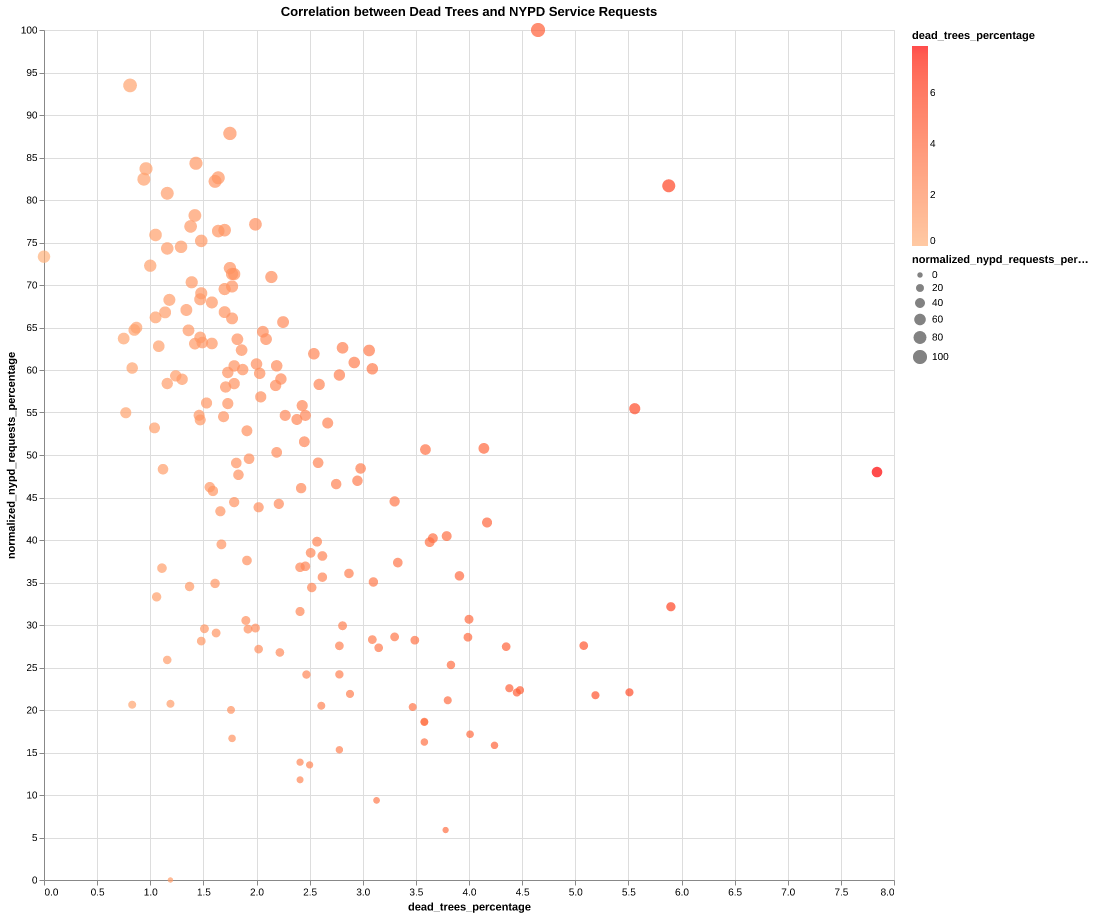

In [64]:
from sklearn.metrics import r2_score
from numpy import corrcoef


# Compute Pearson Correlation using scikit-learn's R^2 metric (Pearson correlation is the square root of R^2)
correlation_matrix = corrcoef(df_merged['dead_trees_percentage'], df_merged['normalized_nypd_requests_percentage'])
pearson_correlation = correlation_matrix[0, 1]
print(f"Pearson correlation: {pearson_correlation}")

# Create the scatter plot with adjusted size and color based on the specified conditions
scatter_chart = alt.Chart(df_merged).mark_point(filled=True).encode(
    x='dead_trees_percentage',
    y='normalized_nypd_requests_percentage',
    size=alt.Size('normalized_nypd_requests_percentage', scale=alt.Scale(domain=[df_merged['normalized_nypd_requests_percentage'].min(), df_merged['normalized_nypd_requests_percentage'].max()], range=[30, 200])),  # Adjusted to show more visible outliers
    color=alt.Color('dead_trees_percentage', scale=alt.Scale(scheme='reds', domain=[df_merged['dead_trees_percentage'].min(), df_merged['dead_trees_percentage'].max()], range=["white", "red"])),  # More saturated 'reds' color scale
    tooltip=['zipcode', 'dead_trees_percentage', 'normalized_nypd_requests_percentage']
).properties(
    title='Correlation between Dead Trees and NYPD Service Requests',
    width=global_chart_width,
    height=global_chart_width,
)

scatter_chart

##### **Part 4: Explanation**

---

**Answer:**

After merging the data, we have a dataset where each zip code contains the relevant columns.

From this merged dataset, the Pearson correlation coefficient is calculated to understand the relationship between the percentage of dead trees and the percentage of normalized NYPD service requests (excluding noise complaints).

The calculated **Pearson correlation** is approximately **-0.41**, which suggests a moderate negative correlation between the percentage of dead trees and the normalized number of service requests. This negative correlation implies that as the proportion of dead trees increases, the proportion of NYPD service requests (excluding noise complaints) tends to decrease, though the relationship is not very strong.

---

**Code Explanation:**

- **Data Merging:**
  - `df4a_2['zipcode'] = df4a_2['zipcode'].astype(str)` and `df4a_3['zipcode'] = df4a_3['zipcode'].astype(str)`: This converts the `zipcode` columns in both dataframes to strings so that they can be merged based on a common column.
  - `df_merged = df4a_2.merge(df4a_3, on="zipcode", how="inner")`: This merges the two dataframes (`df4a_2` containing tree data and `df4a_3` containing NYPD service request data) on the `zipcode` column. The `how="inner"` argument ensures that only zip codes present in both datasets are included in the merged dataframe.

- **Pearson Correlation Calculation:**
  - `corrcoef(df_merged['dead_trees_percentage'], df_merged['normalized_nypd_requests_percentage'])`: This calculates the Pearson correlation coefficient between the two columns (`dead_trees_percentage` and `normalized_nypd_requests_percentage`) in the merged dataframe.
  - The `Pearson correlation` value is computed as approximately **-0.4121**, indicating a moderate negative relationship.

- **Scatter Plot Visualization:**
  - `alt.Chart(df_merged).mark_point(filled=True).encode(...)`: This generates a scatter plot using Altair, where:
    - The `x-axis` represents the percentage of dead trees (`dead_trees_percentage`).
    - The `y-axis` represents the normalized percentage of NYPD service requests (`normalized_nypd_requests_percentage`).
    - `size=alt.Size('normalized_nypd_requests_percentage', ...)` adjusts the size of each point based on the value of `normalized_nypd_requests_percentage`.
    - `color=alt.Color('dead_trees_percentage', ...)` adjusts the color of the points according to the `dead_trees_percentage`, with a color gradient from white to red.
    - `tooltip=['zipcode', 'dead_trees_percentage', 'normalized_nypd_requests_percentage']` allows us to see more information when hovering over a data point.
    - `properties(title='Correlation between Dead Trees and NYPD Service Requests')`: Sets the title of the chart.

- **Result Interpretation:**
A **Pearson correlation** measures the strength and direction of the linear relationship between two variables. The value of the correlation coefficient can range from -1 to 1:

- A **positive Pearson correlation** (values closer to 1) means that as one variable increases, the other tends to increase as well.
- A **negative Pearson correlation** (values closer to -1) means that as one variable increases, the other tends to decrease.

In our case, a Pearson correlation of **-0.41** suggests a **moderate negative correlation** between the percentage of dead trees and the normalized number of NYPD service requests. This means that, generally, as the percentage of dead trees increases, the percentage of NYPD service requests (excluding noise complaints) tends to decrease. However, since the value is closer to 0 than to -1, the relationship is not particularly strong.

**Does the Broken Windows Theory Hold?**

The **Broken Windows Theory** posits that visible signs of urban decay (such as broken windows, abandoned buildings, or neglected areas) can contribute to an increase in crime because they signal that a neighborhood is not well cared for, which may encourage more antisocial behavior.

In the context of this analysis:
- **Dead trees** are considered a visible sign of urban decay.
- **NYPD service requests** (excluding noise complaints) are used as a proxy for disturbances that might be related to crime or other social issues.

The **Pearson correlation** of **-0.41** suggests a **moderate negative relationship** between the percentage of dead trees and the number of NYPD service requests (excluding noise complaints). Here's what this implies in the context of the **Broken Windows Theory**:

- A **negative correlation** suggests that areas with a higher percentage of dead trees tend to have fewer NYPD service requests.
- This **does not support** the Broken Windows Theory, which would expect an **increase in service requests** (especially related to crime) as a sign of urban decay (e.g., dead trees). According to the theory, more signs of decay would lead to more requests for police intervention due to disturbances or crimes.
  
Thus, this result **does not support the hypothesis** of the Broken Windows Theory. Instead, the finding might indicate that other factors are influencing the service requests more than the condition of the trees.

### Potential Confounding Variables

Several **confounding variables** could explain the **negative correlation**:

1. **Income and socio-economic factors**: Zip codes with higher percentages of dead trees may be areas with lower socio-economic status, which could have fewer requests for NYPD services (due to either less reporting of crimes or different types of policing needs). Areas with wealthier residents or more resources may have fewer dead trees and more service requests.
  
2. **Urban density**: In more densely populated areas, there could be more police interactions regardless of the condition of the trees, while in less densely populated areas, even with dead trees, there may be fewer disturbances and thus fewer requests for police services.

3. **NYPD reporting practices**: Service requests may not always be uniformly reported across all zip codes, leading to skewed data. For instance, some areas might underreport crimes or disturbances due to social or cultural reasons, leading to lower NYPD service requests.

4. **Other forms of urban decay**: Dead trees are just one form of urban decay. There could be other, more significant signs of neglect or decay (e.g., abandoned buildings, graffiti, infrastructure problems) that are more strongly correlated with crime or disturbances, but these are not captured in the data.

**Conclusion**

The **negative Pearson correlation** between dead trees and NYPD service requests does not align with the predictions of the **Broken Windows Theory**, which would suggest that urban decay (including dead trees) should lead to more service requests (e.g., due to crime or disturbances). The correlation may reflect other socio-economic or structural factors that influence both the condition of trees and the level of service requests. To better understand the dynamics at play, it would be helpful to explore additional variables, such as income levels, police reporting practices, and other forms of urban decay.





### Q5: Tree-Related Complaints

#### Q5a
Use the 311 dataset to count how many tree-related complaints each agency (for example `NYPD` or other agencies) received. Tree-related complaints are those that include the word `"Tree"` in the `complaint_type` field (case sensitive).

In [65]:
# 5a)
query5a = """
SELECT
  agency,
  COUNT(*) AS tree_complaints_count
FROM `bigquery-public-data.new_york_311.311_service_requests`
WHERE complaint_type LIKE '%Tree%'  -- Filters for complaint types that include the word "Tree" (case-sensitive)
GROUP BY agency
ORDER BY tree_complaints_count DESC  -- Orders agencies by the number of tree-related complaints
"""

# Execute the query
query_job5a = client.query(query5a)
df5a = query_job5a.result().to_dataframe()

# Display the results
df5a.head()

,agency,tree_complaints_count
0,DPR,899528
1,DSNY,1986
2,NYPD,2
3,ACS,1
4,DOHMH,1


##### Q5a Explanation

blablabla

#### Q5b
Filter the tree-related complaints to include only such complaints to the agency with the highest number of tree-related complaints you have found in (a.). Find the three most common types of these tree-related complains and display them in a table with their counts.
Finally, create a bar chart that shows the number of the tree-related complaints of these three types for each year, where each bar is divided into three sub-bars of different colors, each indicating the tree-related complaint of each type in this year.

**Hint:** consider using a window function and the pivot function in Python to simplify the plot.

In [66]:
# # 5b)
# Identify the agency with the highest number of tree-related complaints
top_agency = df5a.iloc[0]['agency']  # Assumes that the first row has the agency with the most complaints

# Write a query to filter the complaints for the top agency and count the three most common complaint types
query5b = f"""
SELECT
  complaint_type,
  COUNT(*) AS complaint_count
FROM `bigquery-public-data.new_york_311.311_service_requests`
WHERE complaint_type LIKE '%Tree%'  -- Filters for tree-related complaints
  AND agency = '{top_agency}'  -- Filters for complaints made to the agency with the highest count
GROUP BY complaint_type
ORDER BY complaint_count DESC
LIMIT 3  -- Limits the results to the top 3 complaint types
"""

# Execute the query
query_job5b = client.query(query5b)
df5b = query_job5b.result().to_dataframe()

# Display the results
df5b.head()

,complaint_type,complaint_count
0,Damaged Tree,387695
1,New Tree Request,183445
2,Overgrown Tree/Branches,178582


In [67]:
query5b_chart = f"""
SELECT
  EXTRACT(YEAR FROM created_date) AS year,
  complaint_type,
  COUNT(*) AS complaint_count
FROM `bigquery-public-data.new_york_311.311_service_requests`
WHERE complaint_type IN (
    SELECT complaint_type
    FROM (
      SELECT
        complaint_type,
        COUNT(*) AS complaint_count
      FROM `bigquery-public-data.new_york_311.311_service_requests`
      WHERE complaint_type LIKE '%Tree%'
        AND agency = '{top_agency}'
      GROUP BY complaint_type
      ORDER BY complaint_count DESC
      LIMIT 3
    )
)
  AND agency = '{top_agency}'
GROUP BY complaint_type, year
ORDER BY complaint_type, year
"""

# Execute the query
query_job5b_chart = client.query(query5b_chart)
df5b_chart = query_job5b_chart.result().to_dataframe()

# Display the first few rows of the result
df5b_chart.head()


,year,complaint_type,complaint_count
0,2010,Damaged Tree,39178
1,2011,Damaged Tree,32104
2,2012,Damaged Tree,50434
3,2013,Damaged Tree,17741
4,2014,Damaged Tree,19893


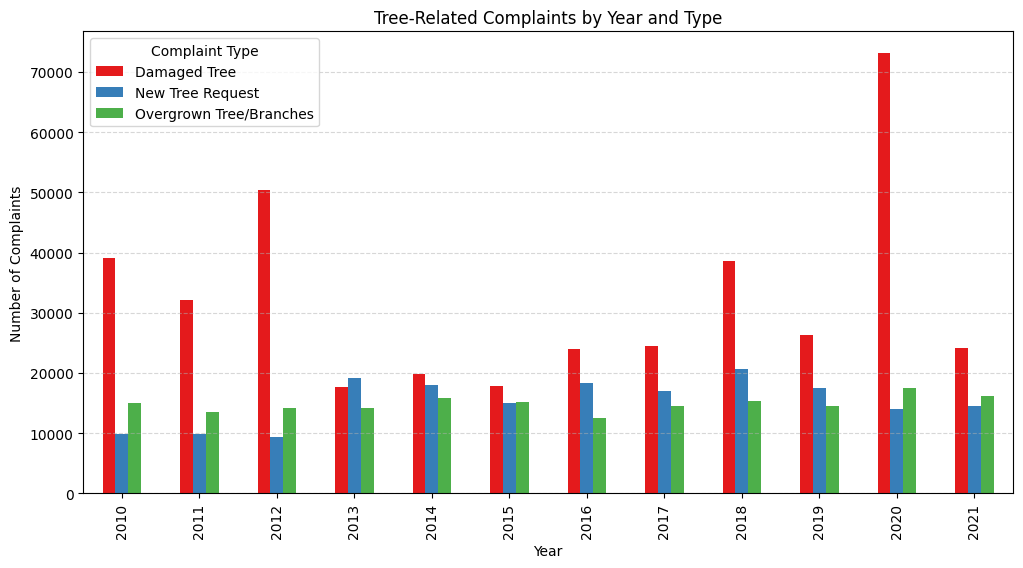

In [68]:
# Pivot the data so each complaint type becomes a separate column
df_pivot = df5b_chart.pivot(index='year', columns='complaint_type', values='complaint_count')

# Reset index for plotting purposes
df_pivot = df_pivot.reset_index()

import matplotlib.pyplot as plt

# Plot a grouped bar chart
df_pivot.plot(
    kind='bar',
    x='year',
    stacked=False,
    figsize=(12, 6),
    color=['#e41a1c', '#377eb8', '#4daf4a']  # Custom colors for each complaint type
)


plt.title('Tree-Related Complaints by Year and Type')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.legend(title='Complaint Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### Q5b Explanation

blablabla

# Unix  - 32 points
There are 5 questions in this part. Every question is worth 6 points except question 5 that is worth 8 points. You should solve all the questions using unix commands and include them in your answer, together with additional code/analysis required and the requested results.

## Q1: Simple Counting
 Copy the `review-Oregon.json.gz` file from the moriah cluster, located at
 the path `/sci/labs/orzuk/orzuk/teaching/big_data_mining_52002/midterm_2024_25` or at `/sci/home/orzuk`.
 You may work at the moriah cluster (recommended) or your personal computer.
Extract the file's content, and use the `wc` command to display the number of lines,words, and characters in the `review-Oregon.json` file. Print the first line of the file and briefly explain what the data represents.  


<div style="font-family: 'Courier New', monospace; font-size: 14px; background-color: #1e1e1e; color: #d4d4d4; padding: 20px; border-radius: 10px; line-height: 1.8em;">
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$ ls /sci/home/orzuk</span><br>
<span style="color: #dcdcaa;">
big_questions.txt*  index.html          ncbi/           review-Oregon.json.gz   Videos/<br>
Chr22.info          install.sh          news.html       safe@                   www/<br>
Desktop/            karateclub/         nohup.out.gz    SameCh22.ped.TAGS       zone.tar.Z<br>
Documents/          lll.txt*            perl5/          SameCh22.ped.TESTS<br>
Downloads/          Mail/               Pictures/       stack3.txt*<br>
gsl/                Music/              Public/         Templates/<br>
icore-home@         my_github_repos/    R/              tn3270.tar.Z
</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$ scp /sci/home/orzuk/review-Oregon.json.gz .</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$ ls</span><br>
Desktop/  review-Oregon.json.gz<br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$ gzip -d review-Oregon.json.gz</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$ ls</span><br>
Desktop/  review-Oregon.json<br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$ wc review-Oregon.json</span><br>
<span style="color: #dcdcaa;">11012170  424536800 3590454764 review-Oregon.json</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$ head -n 1 review-Oregon.json</span><br>
<span style="color: #ce9178;">{"user_id": "108990823942597776781", "name": "Richard Carroll", "time": 1604639688837, "rating": 5, "text": "Fabulous food and amazing service.  Will be back for more!  The beef ribs are killer.", "pics": null, "resp": null, "gmap_id": "0x80dce9997c8d25fd:0xc6c81c1983060cbc"}</span><br><br>
</div>


#### Q1 Explanations

1. `ls /sci/home/orzuk`: Lists the contents of the `/sci/home/orzuk` directory.
2. `scp /sci/home/orzuk/review-Oregon.json.gz .`: Copies the file `review-Oregon.json.gz` from the remote machine to the current directory.
3. `ls`: Lists the contents of the current directory (now includes `review-Oregon.json.gz`).
4. `gzip -d review-Oregon.json.gz`: Decompresses `review-Oregon.json.gz` to `review-Oregon.json`.
5. `ls`: Lists the contents of the current directory (now includes `review-Oregon.json`).
6. `wc review-Oregon.json`: Counts lines, words, and bytes in the `review-Oregon.json` file.
7. `head -n 1 review-Oregon.json`: Displays the first line of the `review-Oregon.json` file.

## Q2: Food and Images
Count the number of comments that include the word `"food"` (**not** case sensative). Out of those comments, determine how many included at least one image.

Next, perform the same query for the rest of the comments (that don't contain the word "food") and compare the proportions of comments with an image in the two categories. Is the difference in proportions statistically significant?

Describe a statistical test and test statistic and display the results. For the last calculation of the `test statistic` and `p-value` manual computation is allowed, but all previous steps should be implemented in unix commands. Explain the Unix command you wrote in simple language.

<div style="font-family: 'Courier New', monospace; font-size: 14px; background-color: #1e1e1e; color: #d4d4d4; padding: 20px; border-radius: 10px; line-height: 1.8em;">
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$</span><br>
<span style="color: #569cd6;">food_comments_count=$(grep -i '"text":.*food' review-Oregon.json | wc -l)</span><br>
<span style="color: #569cd6;">food_with_image_count</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">grep</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-i</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">'"text":</span><span style="color: #569cd6;">.*</span><span style="color: #569cd6;">food</span><span style="color: #569cd6;">'</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">review-Oregon.json</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">grep</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-c</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">'"pics":</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">\[</span><span style="color: #569cd6;">.*</span><span style="color: #569cd6;">\]'</span><span style="color: #569cd6;">)</span><br>
<span style="color: #569cd6;">non_food_comments_count=$(grep -iv '"text":.*food' review-Oregon.json | wc -l)</span><br>
<span style="color: #569cd6;">non_food_with_image_count</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">grep</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-iv</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">'"text":</span><span style="color: #569cd6;">.*</span><span style="color: #569cd6;">food</span><span style="color: #569cd6;">'</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">review-Oregon.json</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">grep</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-c</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">'"pics":</span><span style="color: #569cd6;">  </span><span style="color: #569cd6;">\[</span><span style="color: #569cd6;">.*</span><span style="color: #569cd6;">\]'</span><span style="color: #569cd6;">)</span><br>
<span style="color: #569cd6;">echo "Number of comments that include the word 'food': $food_comments_count"</span><br>
<span style="color: #569cd6;">echo "Number of comments that include the word 'food' and at least one image: $food_with_image_count"</span><br>
<span style="color: #569cd6;">echo "Number of comments that do not include the word 'food': $non_food_comments_count"</span><br>
<span style="color: #569cd6;">echo "Number of comments that do not include the word 'food' but include at least one image: $non_food_with_image_count"</span><br>
<span style="color: #dcdcaa;">Number of comments that include the word 'food': 1182408</span><br>
<span style="color: #dcdcaa;">Number of comments that include the word 'food' and at least one image: 62165</span><br>
<span style="color: #dcdcaa;">Number of comments that do not include the word 'food': 9829762</span><br>
<span style="color: #dcdcaa;">Number of comments that do not include the word 'food' but include at least one image: 285692</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$</span><br>
<span style="color: #569cd6;">p1</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">echo</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">"scale</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">5</span><span style="color: #569cd6;">; </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">food_with_image_count</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">/</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">food_comments_count</span><span style="color: #569cd6;">"</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">bc</span><span style="color: #569cd6;">)</span><br>
<span style="color: #569cd6;">p2</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">echo</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">"scale</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">5</span><span style="color: #569cd6;">; </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">non_food_with_image_count</span><span style="color: #569cd6;">/</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">non_food_comments_count</span><span style="color: #569cd6;">"</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">bc</span><span style="color: #569cd6;">)</span><br>
<span style="color: #569cd6;">echo "Proportion of food-related comments with images (p1): $p1"</span><br>
<span style="color: #569cd6;">echo "Proportion of non-food-related comments with images (p2): $p2"</span><br>
<span style="color: #dcdcaa;">Proportion of food-related comments with images (p1): .05257</span><br>
<span style="color: #dcdcaa;">Proportion of non-food-related comments with images (p2): .02906</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$</span><br>
<span style="color: #569cd6;">P</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">echo</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">"scale</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">5</span><span style="color: #569cd6;">; </span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">food_with_image_count</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">+</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">non_food_with_image_count</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">/</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">food_comments_count</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">+</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">non_food_comments_count</span><span style="color: #569cd6;">)"</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">bc</span><span style="color: #569cd6;">)</span><br>
<span style="color: #569cd6;">echo "Pooled proportion (P) of comments with images: $P"</span><br>
<span style="color: #dcdcaa;">Pooled proportion (P) of comments with images: .03158</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$</span><br>
<span style="color: #569cd6;">n1=$food_comments_count</span><br>
<span style="color: #569cd6;">n2=$non_food_comments_count</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$</span><br>
<span style="color: #569cd6;">Z</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">echo</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">"scale</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">10</span><span style="color: #569cd6;">; </span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">p1</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">p2</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">/</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">sqrt</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">P</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">*</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">1</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">P</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">*</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">1</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">/</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">n1</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">+</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">1</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">/</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">n2</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;">)"</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">bc</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-l</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;"><br>echo</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">"Z-score:</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">Z</span><span style="color: #569cd6;">"</span><br>
<span style="color: #dcdcaa;">Z-score: 138.2941176470</span><br><br>
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$</span><br>
<span style="color: #569cd6;"></span><span style="color: #569cd6;">if</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">((</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">echo</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">"$</span><span style="color: #569cd6;">Z</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">&gt;</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">6</span><span style="color: #569cd6;">"</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">bc</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-l</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;"> ));</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">then</span><br>
<span style="color: #569cd6;">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="color: #569cd6;">p_value</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">0</span><br>
<span style="color: #569cd6;">else</span><br>
<span style="color: #569cd6;">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="color: #569cd6;">p_value</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">echo</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">"scale</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">5</span><span style="color: #569cd6;">; </span><span style="color: #569cd6;">2</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">*</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">1</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">1</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">/</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">1</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">+</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">e</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">l</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">-</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">Z</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;">)</span><span style="color: #569cd6;">)))</span><span style="color: #569cd6;">"</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">bc</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-l</span><span style="color: #569cd6;">)</span><br>
<span style="color: #569cd6;">fi</span><br>
<span style="color: #569cd6;">echo</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">"p-value:</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">p_value</span><span style="color: #569cd6;">"</span><br>
<span style="color: #dcdcaa;">p-value:</span><span style="color: #569cd6;"> </span><span style="color: #dcdcaa;">0</span><br>
</div>


#### Q2 Explanations
##### terminal commands

1. `food_comments_count=$(grep -i '"text":.*food' review-Oregon.json | wc -l)`:
   - `grep -i`: Case-insensitive search for the pattern `"text":.*food` in `review-Oregon.json`.

   - `wc -l`: Counts the number of lines in the output (total number of comments with the word "food").

2. `food_with_image_count=$(grep -i '"text":.*food' review-Oregon.json | grep -c '"pics": \[.*\]')`:
   - `grep -i '"text":.*food'`: Case-insensitive search for comments containing "food".

   - `grep -c '"pics": \[.*\]'`: Count occurrences where the "pics" field is non-empty (indicating the presence of images).

3. `non_food_comments_count=$(grep -iv '"text":.*food' review-Oregon.json | wc -l)`:
   - `grep -iv '"text":.*food'`: Case-insensitive search to exclude comments containing the word "food" (`-iv` is for inversion).

   - `wc -l`: Counts the number of lines in the output (total number of comments without the word "food").

4. `non_food_with_image_count=$(grep -iv '"text":.*food' review-Oregon.json | grep -c '"pics": \[.*\]')`:
   - `grep -iv '"text":.*food'`: Excludes comments containing "food".

   - `grep -c '"pics": \[.*\]'`: Counts occurrences where the "pics" field contains images.

5. `echo "Number of comments that include the word 'food': $food_comments_count"`:
   - `echo`: Outputs a string, including the value of `food_comments_count`.

6. `echo "Number of comments that include the word 'food' and at least one image: $food_with_image_count"`:
   - `echo`: Outputs the value of `food_with_image_count`.

7. `echo "Number of comments that do not include the word 'food': $non_food_comments_count"`:
   - `echo`: Outputs the value of `non_food_comments_count`.

8. `echo "Number of comments that do not include the word 'food' but include at least one image: $non_food_with_image_count"`:
   - `echo`: Outputs the value of `non_food_with_image_count`.

9. `p1=$(echo "scale=5; $food_with_image_count / $food_comments_count" | bc)`:
   - `echo`: Generates a string for the division.

   - `scale=5`: Sets the precision to 5 decimal places in `bc`.

   - `bc`: A command-line calculator that performs the division and calculates `p1`, the proportion of food comments with images.

10. `p2=$(echo "scale=5; $non_food_with_image_count/$non_food_comments_count" | bc)`:
    - `echo`: Generates a string for the division.

    - `scale=5`: Sets the precision to 5 decimal places in `bc`.

    - `bc`: Performs the division and calculates `p2`, the proportion of non-food comments with images.

11. `echo "Proportion of food-related comments with images (p1): $p1"`:
    - `echo`: Outputs the calculated proportion of food-related comments with images (`p1`).

12. `echo "Proportion of non-food-related comments with images (p2): $p2"`:
    - `echo`: Outputs the calculated proportion of non-food-related comments with images (`p2`).

13. `P=$(echo "scale=5; ($food_with_image_count + $non_food_with_image_count) / ($food_comments_count + $non_food_comments_count)" | bc)`:
    - `echo`: Constructs a string to calculate the pooled proportion.

    - `scale=5`: Ensures the result is computed with 5 decimal places.

    - `bc`: Calculates the pooled proportion `P` of comments with images across both food and non-food categories.

14. `echo "Pooled proportion (P) of comments with images: $P"`:
    - `echo`: Outputs the pooled proportion (`P`).

15. `n1=$food_comments_count`:
    - Variable assignment: Stores the value of `food_comments_count` in variable `n1`.

16. `n2=$non_food_comments_count`:
    - Variable assignment: Stores the value of `non_food_comments_count` in variable `n2`.

17. `Z=$(echo "scale=10; ($p1 - $p2) / sqrt($P * (1 - $P) * (1 / $n1 + 1 / $n2))" | bc -l)`:
    - `echo`: Constructs a string for the Z-score calculation.

    - `scale=10`: Sets precision to 10 decimal places for greater accuracy.

    - `sqrt()`: Computes the square root inside the formula.

    - `bc -l`: Uses `bc` with the `-l` flag to enable mathematical functions like `sqrt()` and to handle floating-point arithmetic.

    - Computes the Z-score for the difference in proportions between food-related and non-food-related comments with images.

18. `echo "Z-score: $Z"`:
    - `echo`: Outputs the calculated Z-score value (`Z`).

19. `if (( $(echo "$Z > 6" | bc -l) )); then p_value=0`:
    - `if (( ... ))`: Conditional test for Z-score greater than 6.

    - `$(echo "$Z > 6" | bc -l)`: Evaluates whether the Z-score is greater than 6 using `bc` for floating-point comparison.

    - If the Z-score is greater than 6, sets `p_value` to `0`.

20. `else p_value=$(echo "scale=5; 2 * (1 - (1 / (1 + e(l(-$Z))))))" | bc -l)`:
    - `else`: Executes if Z-score is not greater than 6.

    - `echo`: Constructs the p-value formula based on the Z-score.

    - `e()`: Exponentiation function in `bc`.

    - `l()`: Natural logarithm function in `bc`.
    
    - `bc -l`: Performs the p-value calculation using `bc`.

21. `fi`: Ends the conditional block.

22. `echo "p-value: $p_value"`:
    - `echo`: Outputs the final p-value result.


##### Statistical analysis
$$
Z = \frac{p_1 - p_2}{\sqrt{P \cdot (1 - P) \cdot \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
$$

Where:

- \$p_1\$ = proportion of food-related comments with images
- \$p_2\$ = proportion of non-food-related comments with images
- \$P\$ = pooled proportion
- \$n_1\$ = number of food-related comments
- \$n_2\$ = number of non-food-related comments

The pooled proportion is:

$$
P = \frac{(x_1 + x_2)}{(n_1 + n_2)}
$$

Where:
- \$x_1\$ = number of food-related comments with images
- \$x_2\$ = number of non-food-related comments with images

Finally, the p-value for a two-tailed test is:

$$
p\text{-value} = 2 \times \left( 1 - \Phi(|Z|) \right) = 0
$$

Where \$\Phi(|Z|)\$ is the cumulative distribution function (CDF) of the standard normal distribution evaluated at the absolute value of the Z-score.
In this case, since the p-value is less than 0.05, we can reject the null hypothesis and conclude that the difference in proportions of comments with images is statistically significant.


## Q3: Top Users
From the people who mentioned `"food"` (**not** case sensative) in their comments, find the three users with the highest number of comments about `food` and display their user-ids together with the number of such comments for each one.


<div style="font-family: 'Courier New', monospace; font-size: 14px; background-color: #1e1e1e; color: #d4d4d4; padding: 20px; border-radius: 10px; line-height: 1.8em;">
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$ grep -i '"text":.*food' review-Oregon.json | jq -r '.user_id' | grep -v 'null' | sort | uniq -c | sort -nr | head -n 3</span><br>
<span style="color: #dcdcaa;">    299 100150831663760014553</span><br>
<span style="color: #dcdcaa;">    165 114651618825277458119</span><br>
<span style="color: #dcdcaa;">    145 110494514107558004797</span><br>
</div>


#### Q3 Explanations
1. `grep -i '"text":.*food' review-Oregon.json`: Filters comments that contain the word "food" (case-insensitive).

2. `jq -r '.user_id'`: Extracts the `user_id` field from each JSON line. This assumes you have the `jq` tool installed, which is used for parsing JSON.

3. `grep -v null`: filters out lines containing the word "null," which could occur if the user_id is missing or invalid in some comments.

4. `sort`: Sorts the user IDs alphabetically.

5. `uniq -c`: Counts occurrences of each user ID.

6. `sort -nr`: Sorts the results numerically in descending order (highest count first).

7. `head -n 4`: Displays the top 3 users.




## Q4: Splitting
Split the `review-Oregon.json` file into different files based on the `rating` value. Name each file as `reviews_rating_i`, where `i` represents the rating value, and count the number of comments in each of these files.

<div style="font-family: 'Courier New', monospace; font-size: 14px; background-color: #1e1e1e; color: #d4d4d4; padding: 20px; border-radius: 10px; line-height: 1.8em;">
<span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span><span style="color: #569cd6;">:</span><span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;">$</span><br>
<span style="color: #569cd6;">ratings</span><span style="color: #569cd6;">=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(</span><span style="color: #569cd6;">jq</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">-r</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">'.rating'</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">review-Oregon.json</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">sort</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">|</span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">uniq</span><span style="color: #569cd6;">)</span><br>
<span style="color: #569cd6;">for</span> <span style="color: #569cd6;">i</span> <span style="color: #569cd6;">in</span> <span style="color: #569cd6;">{1..5}</span><span style="color: #569cd6;">;</span> <span style="color: #569cd6;">do</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: #569cd6;">grep</span> <span style="color: #569cd6;">"\"</span><span style="color: #569cd6;">rating</span><span style="color: #569cd6;">\":</span> <span style="color: #569cd6;">$</span><span style="color: #569cd6;">i</span><span style="color: #569cd6;">"</span> <span style="color: #569cd6;">review-Oregon.json</span> <span style="color: #569cd6;">&gt;</span> <span style="color: #569cd6;">"/sci/courses/2024/52002/nathan.pasder/reviews_rating_</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">{</span><span style="color: #569cd6;">i</span><span style="color: #569cd6;">}</span><span style="color: #569cd6;">.json"</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;<span style="color: #569cd6;">echo</span> <span style="color: #569cd6;">"reviews_rating_</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">{</span><span style="color: #569cd6;">i</span><span style="color: #569cd6;">}</span><span style="color: #569cd6;">.json: </span><span style="color: #569cd6;">$(</span><span style="color: #569cd6;">wc</span> <span style="color: #569cd6;">-l</span> <span style="color: #569cd6;">&lt;</span> <span style="color: #569cd6;">/sci/courses/2024/52002/nathan.pasder/reviews_rating_</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">{</span><span style="color: #569cd6;">i</span><span style="color: #569cd6;">}</span><span style="color: #569cd6;">.json</span><span style="color: #569cd6;">)</span> <span style="color: #569cd6;">lines"</span><br>
<span style="color: #569cd6;">done</span><br>
<span style="color: #569cd6;">ls</span> <span style="color: #569cd6;">/sci/courses/2024/52002/nathan.pasder/</span><br><br>
<span style="color: #dcdcaa;">reviews_rating_1.json: 684229 lines</span><br>
<span style="color: #dcdcaa;">reviews_rating_2.json: 339248 lines</span><br>
<span style="color: #dcdcaa;">reviews_rating_3.json: 858467 lines</span><br>
<span style="color: #dcdcaa;">reviews_rating_4.json: 2059032 lines</span><br>
<span style="color: #dcdcaa;">reviews_rating_5.json: 7012178 lines</span><br>
<span style="color: #dcdcaa;">reviews_rating_1.json  reviews_rating_2.json  reviews_rating_3.json  reviews_rating_4.json  reviews_rating_5.json</span><br>

</div>


#### Q4 Explanations

1. `ratings=$(jq -r '.rating' review-Oregon.json | sort | uniq)`:
   - `jq -r '.rating' review-Oregon.json`: Extracts the `rating` field from each JSON object in `review-Oregon.json` using the `jq` command.
   - `sort`: Sorts the extracted ratings in ascending order.
   - `uniq`: Removes duplicate entries, leaving only the unique rating values.
   - The result is stored in the variable `ratings`, containing the unique rating values.

2. `for i in {1..5}; do`:
   - A `for` loop iterates over the values 1 through 5 (representing the possible rating values from 1 to 5).

3. `grep "\"rating\": $i" review-Oregon.json > "/sci/courses/2024/52002/nathan.pasder/reviews_rating_${i}.json"`:
   - `grep "\"rating\": $i" review-Oregon.json`: Searches for lines in `review-Oregon.json` where the `rating` field equals the current value of `i` in the loop.
   - The output (matching reviews) is redirected (`>`) to a new JSON file named `reviews_rating_${i}.json` in the specified directory.

4. `echo "reviews_rating_${i}.json: $(wc -l < /sci/courses/2024/52002/nathan.pasder/reviews_rating_${i}.json) lines"`:
   - `wc -l < /sci/courses/2024/52002/nathan.pasder/reviews_rating_${i}.json`: Counts the number of lines in the newly created `reviews_rating_${i}.json` file.
   - `echo`: Prints the file name and the line count (number of reviews with that rating).

5. `done`: Ends the `for` loop after all iterations (for ratings 1 to 5).

6. `ls /sci/courses/2024/52002/nathan.pasder/`:
   - Lists the files in the specified directory (`/sci/courses/2024/52002/nathan.pasder/`), showing the newly created JSON files (`reviews_rating_1.json`, `reviews_rating_2.json`, etc.).

**Output Explanation**: After the loop completes, five JSON files are generated, each containing reviews with a specific rating (1 through 5). The `ls` command shows these files along with their line counts:
- `reviews_rating_1.json`: 684,229 lines

- `reviews_rating_2.json`: 339,248 lines

- `reviews_rating_3.json`: 858,467 lines

- `reviews_rating_4.json`: 2,059,032 lines

- `reviews_rating_5.json`: 7,012,178 lines

## Q5: Count Frequent Words
 Write a Python program (.py format) that takes a file name (as a string) and a natural number `k` as input. The program should read the file, extract the words from the reviews, split them into individual words, and print the top `k` most frequent words. Remove any stop words (common words) before computing the frequencies.  

 Next, run a shell script that runs the Python program you wrote on all the different rating files created earlier in Qu. 4 and print the top 5 most frequent words for each rating.  

```python
import pandas as pd
import string
from collections import Counter
import re
import time
from colorama import Fore, Style
from tqdm import tqdm
import sys
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to clean a string (long text or stopwords)
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Keep only alphabetic characters and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text.split()

# Function to extract top k frequent words from JSON file using pandas
def get_top_k_frequent_words_from_json(json_filename, k):
    try:
        # Define the chunksize to load in smaller parts
        chunksize = 50000  # Number of rows to read at a time

        # Initialize an empty list to store chunks of data
        chunks = []
        total_lines_processed = 0
        total_memory_usage = 0
    
        # Initialize progress bar
        start_time = time.time()
        
        print(f"({json_filename}) {Fore.YELLOW}Processing JSON file {json_filename} into a DataFrame...{Style.RESET_ALL}")
        # Read the file in chunks
        for i, chunk in enumerate(pd.read_json(json_filename, lines=True, chunksize=chunksize)):
            chunks.append(chunk)
            total_lines_processed += len(chunk)
            total_memory_usage += chunk.memory_usage(deep=True).sum() / (1024 ** 3)  # Convert to GB
            elapsed_time = time.time() - start_time
            
            # Dynamic progress bar
            print(f"({json_filename}) ",end='')
            print(f"{Style.RESET_ALL}{Fore.CYAN}Processing Chunk {i + 1}{Style.RESET_ALL} | "
                  f"{Fore.GREEN}Total lines processed: {total_lines_processed}{Style.RESET_ALL} | "
                  f"{Fore.MAGENTA}Memory Usage: {round(total_memory_usage, 2)} GB{Style.RESET_ALL} | "
                  f"{Fore.BLUE}Time: {divmod(int(elapsed_time), 60)[0]:02d}:{divmod(int(elapsed_time), 60)[1]:02d}{Style.RESET_ALL}", end='\r')
            
        # Concatenate the chunks into a final DataFrame
        df = pd.concat(chunks, ignore_index=True)
                    
        print(f"\n({json_filename}) ",end='')
        print(f"{Style.BRIGHT}{Fore.GREEN}Finished processing all chunks from JSON into a DataFrame! Total lines processed: {total_lines_processed}{Style.RESET_ALL}", end = "")
        print(f"\n({json_filename}) {Fore.YELLOW}Columns in the DataFrame:{Style.RESET_ALL} ", df.columns)  # Display DataFrame columns
        print(f"\n({json_filename}) {Style.RESET_ALL}")
        print(df.iloc[:5, :5])  # Display the first 5 rows and first 5 columns

    except ValueError as e:
        print(f"({json_filename}) {Fore.RED}Error reading JSON file: {e}{Style.RESET_ALL}")
        return

    # Check if 'text' column exists in the DataFrame
    if 'text' not in df.columns:
        print(f"({json_filename}) {Fore.RED}'text' column is missing in the JSON data.{Style.RESET_ALL}")
        return
    
    # Extract the "text" column
    text_data = df['text'].dropna().tolist()  # Drop NaN values and convert to a list
    print(f"\n({json_filename}) {Style.BRIGHT}{Fore.GREEN}Total text reviews extracted: {len(text_data)}{Style.RESET_ALL}\n", end ="")
    
    # Clean and split the text into words
    all_words = []
    for text in tqdm(text_data, desc=f"({json_filename}) Cleaning and processing text data", unit="text"):
        all_words.extend(clean_text(text))
    print(f"({json_filename}) {Style.BRIGHT}{Fore.GREEN}Total words extracted: {len(all_words)}{Style.RESET_ALL}")
    
    custom_stopwords = set([
        "in", "a", "an", "the", "on", "at", "to", "of", "for", "by", "with",
        "about", "against", "between", "into", "through", "during", "before",
        "after", "above", "below", "from", "up", "down", "in", "out", "on",
        "off", "over", "under", "again", "further", "then", "once", "here",
        "there", "when", "where", "why", "how", "all", "any", "both", "each",
        "few", "more", "most", "other", "some", "such", "no", "nor", "not",
        "only", "own", "same", "so", "than", "too", "very", "s", "t", "can",
        "will", "just", "dont", "should", "now", "i", "me", "my", "myself",
        "we", "our", "ours", "ourselves", "you", "won", "won't", "wouldn",
        "you're", "you've", "you'll", "you'd", "your", "yours", "yourself",
        "yourselves", "he", "him", "would", "his", "himself", "she", "she's",
        "her", "hers", "herself", "it", "it's", "its", "itself", "they", "them",
        "their", "none", "theirs", "themselves", "what", "which", "who", "whom",
        "this", "that", "that'll", "these", "those", "am", "is", "are", "was",
        "were", "be", "been", "being", "have", "has", "had", "having", "do",
        "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
        "because", "as", "until", "while", "of", "at", "by", "for", "with",
        "about", "against", "between", "into", "through", "during", "before",
        "after", "above", "below", "to", "from", "up", "down", "in", "out", "on",
        "off", "over", "under", "again", "further", "then", "once", "here", "there",
        "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
        "wouldn't", "most", "other", "some", "such", "no", "nor", "not", "only",
        "own", "same", "so", "than", "too", "very", "s", "t", "can", "will",
        "just", "don", "don't", "should", "should've", "now", "d", "ll", "m",
        "o", "re", "ve", "y", "ain", "aren", "aren't", "couldn", "couldn't",
        "didn", "didn't", "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't",
        "haven", "haven't", "isn", "isn't", "ma", "mightn", "mightn't",
        "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn",
        "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "get", "one", "back",
        'call', 'upon', 'still', 'nevertheless', 'down', 'every', 'forty', 're', 'always', 'whole',
        'side', "n't", 'now', 'however', 'an', 'show', 'least', 'give', 'below', 'did', 'sometimes',
        'which', "'s", 'nowhere', 'per', 'hereupon', 'yours', 'she', 'moreover', 'eight', 'somewhere',
        'within', 'whereby', 'few', 'has', 'so', 'have', 'for', 'noone', 'top', 'were', 'those',
        'thence', 'eleven', 'after', 'no', 'll', 'others', 'ourselves', 'themselves', 'though',
        'that', 'nor', 'just', 's', 'before', 'had', 'toward', 'another', 'should', 'herself',
        'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed', 'bottom', 'anyone', 'his',
        'each', 'then', 'both', 'became', 'third', 'whom', 've', 'mine', 'take', 'many', 'anywhere',
        'to', 'well', 'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards', 'none', 'be',
        'herein', 'two', 'using', 'whatever', 'please', 'perhaps', 'full', 'ca', 'we', 'latterly',
        'here', 'therefore', 'us', 'how', 'was', 'made', 'the', 'or', 'may', 're', 'namely', 've',
        'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than', 'why', 'really', 'whither', 'in',
        'only', 'wherein', 'last', 'under', 'own', 'therein', 'go', 'seems', 'm', 'wherever',
        'either', 'someone', 'up', 'doing', 'on', 'rather', 'ours', 'again', 'same', 'over', 's',
        'latter', 'during', 'done', 're', 'put', 'm', 'much', 'neither', 'among', 'seemed', 'into',
        'once', 'my', 'otherwise', 'part', 'everywhere', 'never', 'myself', 'must', 'will', 'am',
        'can', 'else', 'although', 'as', 'beyond', 'are', 'too', 'becomes', 'does', 'a', 'everyone',
        'but', 'some', 'regarding', 'll', 'against', 'throughout', 'yourselves', 'him', 'd', 'it',
        'himself', 'whether', 'move', 'm', 'hereafter', 're', 'while', 'whoever', 'your', 'first',
        'amount', 'twelve', 'serious', 'other', 'any', 'off', 'seeming', 'four', 'itself', 'nothing',
        'beforehand', 'make', 'out', 'very', 'already', 'various', 'until', 'hers', 'they', 'not',
        'them', 'where', 'would', 'since', 'everything', 'at', 'together', 'yet', 'more', 'six',
        'back', 'with', 'thereupon', 'becoming', 'around', 'due', 'keep', 'somehow', 'nt', 'across',
        'all', 'when', 'i', 'empty', 'nine', 'five', 'get', 'see', 'been', 'name', 'between', 'hence',
        'ten', 'several', 'from', 'whereupon', 'through', 'hereby', 'll', 'alone', 'something',
        'formerly', 'without', 'above', 'onto', 'except', 'enough', 'become', 'behind', 'd', 'its',
        'most', 'nt', 'might', 'whereas', 'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby',
        'twenty', 'often', 'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could',
        'because', 'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards',
        'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', 'd', 'say', 'thus',
        'unless', 'along', 'yourself', 'former', 'thru', 'he', 'hundred', 'three', 'sixty', 'me',
        'sometime', 'whose', 'you', 'quite', 've', 'about', 'even'])
    # Download the stopwords data from nltk (only once)
    nltk.download('stopwords', quiet=True)
    nltk_stopwords = set(stopwords.words('english'))
    scikit_stopwords = TfidfVectorizer(stop_words='english').get_stop_words()
    stop_words = nltk_stopwords.union(custom_stopwords).union(scikit_stopwords)
    print(f"({json_filename}) {Style.BRIGHT}{Fore.YELLOW}Stopwords downloaded successfully! Total English stop words: {len(stop_words)}{Style.RESET_ALL}")
    # Get the set of English stop words from nltk

    # Clean stopwords
    cleaned_stopwords = set(clean_text(" ".join(stop_words)))  # Clean the stopwords
    print(f"({json_filename}) {Style.BRIGHT}{Fore.YELLOW}Total cleaned stop words: {len(cleaned_stopwords)}{Style.RESET_ALL}")
    print(f"({json_filename}) {Style.BRIGHT}{Fore.YELLOW}Cleaned stop words are: {Style.RESET_ALL}{stop_words-cleaned_stopwords}")
    
    # Filter out stop words
    filtered_words = [word for word in all_words if word not in cleaned_stopwords]
    print(f"({json_filename}) {Style.BRIGHT}{Fore.GREEN}Total words after filtering stop words: {len(filtered_words)}, {Style.RESET_ALL}{Style.BRIGHT}{Fore.RED}Total stop words removed: {len(all_words)-len(filtered_words)}{Style.RESET_ALL}")

    # Calculate word frequencies
    word_counts = Counter(filtered_words)
    print(f"({json_filename}) {Fore.YELLOW}Total unique words: {len(word_counts)}{Style.RESET_ALL}")
    
    # Get the top k frequent words
    top_k_words = word_counts.most_common(k)
    
    print(f"({json_filename}) {Style.BRIGHT}{Fore.GREEN}Top {k} frequent words:{Style.RESET_ALL}")
    for word, count in top_k_words:
        print(f"({json_filename}) {Fore.CYAN}{word}: {count}{Style.RESET_ALL}")
    
    print(f"({json_filename}) {Style.BRIGHT}{Fore.GREEN}Top k = {k} frequent words extracted successfully.{Style.RESET_ALL}\n\n\n\n\n")



# Get the command-line arguments for the json_filename and k
if len(sys.argv) != 3:
    print(f"{Fore.RED}Usage: python {sys.argv[0]} <json_filename> <k>{Style.RESET_ALL}")
else:
    json_filename = sys.argv[1]
    k = int(sys.argv[2])  # Convert the second argument to an integer
    get_top_k_frequent_words_from_json(json_filename, k)
```

<div style="font-family: 'Courier New', monospace; font-size: 14px; background-color: #1e1e1e; color: #d4d4d4; padding: 20px; border-radius: 10px; line-height: 1.8em;">
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">~</span> <span style="color: #569cd6;"></span><span style="color: #569cd6;">$</span><span style="color: #569cd6;"> cd /sci/courses/2024/52002/nathan.pasder/</span><br>
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span> <span style="color: #569cd6;"></span><span style="color: #569cd6;">$</span><span style="color: #569cd6;"> ls</span><br>
    <span style="color: #dcdcaa;">reviews_rating_1.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_2.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_3.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_4.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_5.json</span><br><br>
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span>  <span style="color: #569cd6;"></span><span style="color: #569cd6;">$</span><span style="color: #569cd6;"></span><span style="color: #569cd6;"> </span><span style="color: #569cd6;">touch MidTerm_Part2_UNIX_Q5.py</   span><br>
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span>  <span style="color: #569cd6;"></span><span style="color: #569cd6;">$</span><span style="color: #569cd6;"> ls</span><br>
    <span style="color: #dcdcaa;">MidTerm_Part2_UNIX_Q5.py&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_1.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_2.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_3.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_4.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_5.json</span><br><br>
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span>  <span style="color: #569cd6;"></span><span style="color: #569cd6;">$</span><span style="color: #569cd6;"> nano MidTerm_Part2_UNIX_Q5.py</span><br>
    <span style="color:rgb(255, 255, 255);">here you copy-paste the python code</span><br><br>
    <span style="color:rgb(255, 255, 255);">now press ctrl+O (Windows) or control+O (MacOS) then press ENTER
    </span><br><br>
    <span style="color:rgb(255, 255, 255);">press ctrl+x (Windows) or control+x (MacOS)
    </span><br><br>
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span>  <span style="color: #569cd6;"></span><span style="color: #569cd6;">$</span><span style="color: #569cd6;"> <br>#!/bin/bash<br>PYTHON_PATH=</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">(which python3)<br> if [ -z "</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">PYTHON_PATH" ]; then</span><br>
    &nbsp;&nbsp;&nbsp;&nbsp;<span style="color: #569cd6;">echo "python3 is not installed or not in the PATH."</span><br>
    &nbsp;&nbsp;&nbsp;&nbsp;<span style="color: #569cd6;">exit 1</span><br>
    <span style="color: #569cd6;">fi</span><br><br>
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span>  <span style="color: #569cd6;"></span><span style="color: #569cd6;">$</span><span style="color: #569cd6;"> <br>VENV_DIR="</span><span style="color: #569cd6;">venv"<br>if [ ! -d "</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">VENV_DIR" ]; then</span><br>
    &nbsp;&nbsp;&nbsp;&nbsp;<span style="color: #569cd6;">echo "Creating virtual environment in <span style="color: #569cd6;">$</span>VENV_DIR..." && srun <span style="color: #569cd6;">$</span>PYTHON_PATH -m venv <span style="color: #569cd6;">$</span><span style="color: #569cd6;">VENV_DIR</span><br>
    <span style="color: #569cd6;">fi</span><br><span style="color: #569cd6;">ls</span><br>
    <span style="color: #dcdcaa;">Creating virtual environment in venv...</span><br>
    <span style="color: #dcdcaa;">srun: job 25749908 queued and waiting for resources</span><br>
    <span style="color: #dcdcaa;">srun: job 25749908 has been allocated resources</span><br>
    <span style="color: #dcdcaa;">MidTerm_Part2_UNIX_Q5.py&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_1.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_2.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_3.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_4.json&nbsp;&nbsp;&nbsp;&nbsp;reviews_rating_5.json&nbsp;&nbsp;&nbsp;&nbsp;venv/</span><br><br>
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span>  <span style="color: #569cd6;"></span><span style="color: #569cd6;">$</span><span style="color: #569cd6;"> echo "Activating virtual environment..." &&</span> <span style="color: #569cd6;">source </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">VENV_DIR/bin/activate</span><br>
    <span style="color: #dcdcaa;">Activating virtual environment...</span><br><br>
    <span style="color: #4ec9b0;">(venv) nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span> <span style="color: #569cd6;">$</span> <span style="color: #569cd6;">echo "Upgrading pip..." && srun python -m pip install --upgrade pip</span><br>
    <span style="color: #4ec9b0;">(venv) nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span> <span style="color: #569cd6;">$</span> <span style="color: #569cd6;">echo "Installing packages..." && srun python -m pip install pandas nltk colorama tqdm scikit-learn</span><br>
    <span style="color: #4ec9b0;">(venv) nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span> <span style="color: #569cd6;">$</span> <span style="color: #569cd6;"><br>for i in {1..5}; do<br>&nbsp;&nbsp;&nbsp;&nbsp;FILE="reviews_rating_</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">{i}.json"<br>&nbsp;&nbsp;&nbsp;&nbsp;echo "Running </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">{FILE}..." && srun python MidTerm_Part2_UNIX_Q5.py "</span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">FILE" 5<br>done</span><br>
    <span style="color:rgb(255, 255, 255);">long output below!</span><br><br>
    <span style="color: #4ec9b0;">(venv) nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span> <span style="color: #569cd6;">$</span> <span style="color: #569cd6;">echo "Deactivating virtual environment..." && deactivate</span><br>
    <span style="color: #dcdcaa;">Deactivating virtual environment...</span><br><br>
    <span style="color: #4ec9b0;">nathan.pasder@moriah-gw-01</span>:<span style="color: #9cdcfe;">/sci/courses/2024/52002/nathan.pasder</span> <span style="color: #569cd6;">$</span> <span style="color: #569cd6;">echo "Deleting virtual environment directory </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">VENV_DIR..." && rm -rf </span><span style="color: #569cd6;">$</span><span style="color: #569cd6;">VENV_DIR && echo "Done."</span><br>
    <span style="color: #dcdcaa;">Deleting virtual environment directory venv...<br>Done.</span><br><br>
</div>


```bash
Running reviews_rating_1.json...
srun: job 25861637 queued and waiting for resources
srun: job 25861637 has been allocated resources
(reviews_rating_1.json) Processing JSON file reviews_rating_1.json into a DataFrame...
(reviews_rating_1.json) Processing Chunk 14 | Total lines processed: 684229 | Memory Usage: 0.43 GB | Time: 00:06
(reviews_rating_1.json) Finished processing all chunks from JSON into a DataFrame! Total lines processed: 684229
(reviews_rating_1.json) Columns in the DataFrame:  Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

(reviews_rating_1.json)
        user_id  ...                                               text
0  1.051374e+20  ...  0 stars. I visited Dr McDonald for a consult i...
1  1.113157e+20  ...                                               None
2  1.060045e+20  ...                                               None
3  1.121196e+20  ...    (Translated by Google) Yeet\n\n(Original)\nYeet
4  1.088318e+20  ...  (Translated by Google) ya yeeeeeet\n\n(Origina...

[5 rows x 5 columns]

(reviews_rating_1.json) Total text reviews extracted: 539643
(reviews_rating_1.json) Cleaning and processing text data: 100%|██████████| 539643/539643 [00:13<00:00, 40402.45text/s]
(reviews_rating_1.json) Total words extracted: 35847998
(reviews_rating_1.json) Stopwords downloaded successfully! Total English stop words: 392
(reviews_rating_1.json) Total cleaned stop words: 386
(reviews_rating_1.json) Cleaned stop words are: {"n't", "aren't", "mustn't", "won't", "you've", "that'll", "'s", "she's", "needn't", "haven't", "it's", "isn't", "weren't", "mightn't", "couldn't", "should've", "doesn't", "hadn't", "shouldn't", "didn't", "you're", "shan't", "you'll", "wasn't", "you'd", "wouldn't", "don't", "hasn't"}
(reviews_rating_1.json) Total words after filtering stop words: 14707634, Total stop words removed: 21140364
(reviews_rating_1.json) Total unique words: 195501
(reviews_rating_1.json) Top 5 frequent words:
(reviews_rating_1.json) service: 145548
(reviews_rating_1.json) time: 121985
(reviews_rating_1.json) food: 113099
(reviews_rating_1.json) told: 98520
(reviews_rating_1.json) like: 97520
(reviews_rating_1.json) Top k = 5 frequent words extracted successfully.





Running reviews_rating_2.json...
srun: job 25861638 queued and waiting for resources
srun: job 25861638 has been allocated resources
(reviews_rating_2.json) Processing JSON file reviews_rating_2.json into a DataFrame...
(reviews_rating_2.json) Processing Chunk 7 | Total lines processed: 339248 | Memory Usage: 0.16 GB | Time: 00:05
(reviews_rating_2.json) Finished processing all chunks from JSON into a DataFrame! Total lines processed: 339248
(reviews_rating_2.json) Columns in the DataFrame:  Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

(reviews_rating_2.json)
        user_id  ...                                               text
0  1.108132e+20  ...  15 minute job cost $165.  They charge one hour...
1  1.067543e+20  ...  Not impressed sat here all day for a job that ...
2  1.165000e+20  ...  I have been going to this location for my chec...
3  1.165000e+20  ...  I have been going to this location for my chec...
4  1.052222e+20  ...                                               None

[5 rows x 5 columns]

(reviews_rating_2.json) Total text reviews extracted: 231907
(reviews_rating_2.json) Cleaning and processing text data: 100%|██████████| 231907/231907 [00:05<00:00, 41590.71text/s]
(reviews_rating_2.json) Total words extracted: 11345558
(reviews_rating_2.json) Stopwords downloaded successfully! Total English stop words: 392
(reviews_rating_2.json) Total cleaned stop words: 386
(reviews_rating_2.json) Cleaned stop words are: {"shan't", "shouldn't", "weren't", "mustn't", "mightn't", "hasn't", "that'll", "won't", "aren't", "needn't", "you'll", "you'd", "wasn't", "isn't", "she's", "couldn't", "didn't", "'s", "it's", "wouldn't", "hadn't", "don't", "you're", "haven't", "doesn't", "n't", "should've", "you've"}
(reviews_rating_2.json) Total words after filtering stop words: 4809251, Total stop words removed: 6536307
(reviews_rating_2.json) Total unique words: 99882
(reviews_rating_2.json) Top 5 frequent words:
(reviews_rating_2.json) food: 68811
(reviews_rating_2.json) service: 48566
(reviews_rating_2.json) good: 47287
(reviews_rating_2.json) like: 41091
(reviews_rating_2.json) time: 40271
(reviews_rating_2.json) Top k = 5 frequent words extracted successfully.





Running reviews_rating_3.json...
srun: job 25861639 queued and waiting for resources
srun: job 25861639 has been allocated resources
(reviews_rating_3.json) Processing JSON file reviews_rating_3.json into a DataFrame...
(reviews_rating_3.json) Processing Chunk 18 | Total lines processed: 858467 | Memory Usage: 0.31 GB | Time: 00:10
(reviews_rating_3.json) Finished processing all chunks from JSON into a DataFrame! Total lines processed: 858467
(reviews_rating_3.json) Columns in the DataFrame:  Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

(reviews_rating_3.json)
        user_id  ...                                               text
0  1.042228e+20  ...  Great food but I definitely would not suggest ...
1  1.068948e+20  ...  We were there at opening only ones good food t...
2  1.048057e+20  ...                                          It was ok
3  1.171568e+20  ...                                               None
4  1.116070e+20  ...                                               None

[5 rows x 5 columns]

(reviews_rating_3.json) Total text reviews extracted: 437901
(reviews_rating_3.json) Cleaning and processing text data: 100%|██████████| 437901/437901 [00:05<00:00, 74478.53text/s]
(reviews_rating_3.json) Total words extracted: 12403782
(reviews_rating_3.json) Stopwords downloaded successfully! Total English stop words: 392
(reviews_rating_3.json) Total cleaned stop words: 386
(reviews_rating_3.json) Cleaned stop words are: {"shan't", "it's", "wouldn't", "you'll", "weren't", "you've", "aren't", "'s", "should've", "haven't", "that'll", "shouldn't", "you'd", "n't", "didn't", "doesn't", "couldn't", "she's", "hadn't", "don't", "mightn't", "isn't", "you're", "won't", "mustn't", "hasn't", "wasn't", "needn't"}
(reviews_rating_3.json) Total words after filtering stop words: 5571119, Total stop words removed: 6832663
(reviews_rating_3.json) Total unique words: 109589
(reviews_rating_3.json) Top 5 frequent words:
(reviews_rating_3.json) good: 119633
(reviews_rating_3.json) food: 109288
(reviews_rating_3.json) service: 64046
(reviews_rating_3.json) great: 56900
(reviews_rating_3.json) place: 56771
(reviews_rating_3.json) Top k = 5 frequent words extracted successfully.





Running reviews_rating_4.json...
srun: job 25861640 queued and waiting for resources
srun: job 25861640 has been allocated resources
(reviews_rating_4.json) Processing JSON file reviews_rating_4.json into a DataFrame...
(reviews_rating_4.json) Processing Chunk 42 | Total lines processed: 2059032 | Memory Usage: 0.69 GB | Time: 00:36
(reviews_rating_4.json) Finished processing all chunks from JSON into a DataFrame! Total lines processed: 2059032
(reviews_rating_4.json) Columns in the DataFrame:  Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

(reviews_rating_4.json)
        user_id  ...                                         text
0  1.032039e+20  ...          Abby loves coming to see the staff!
1  1.165785e+20  ...  Efficient, short visits and easy scheduling
2  1.129489e+20  ...                                         None
3  1.151299e+20  ...                                         None
4  1.089876e+20  ...                                         None

[5 rows x 5 columns]

(reviews_rating_4.json) Total text reviews extracted: 1058968
(reviews_rating_4.json) Cleaning and processing text data: 100%|██████████| 1058968/1058968 [00:12<00:00, 85728.12text/s]
(reviews_rating_4.json) Total words extracted: 22233174
(reviews_rating_4.json) Stopwords downloaded successfully! Total English stop words: 392
(reviews_rating_4.json) Total cleaned stop words: 386
(reviews_rating_4.json) Cleaned stop words are: {"hasn't", "isn't", "mustn't", "you've", "needn't", "should've", "'s", "it's", "doesn't", "n't", "weren't", "shan't", "hadn't", "wouldn't", "wasn't", "couldn't", "won't", "mightn't", "she's", "shouldn't", "don't", "you'd", "haven't", "you'll", "didn't", "aren't", "you're", "that'll"}
(reviews_rating_4.json) Total words after filtering stop words: 10983588, Total stop words removed: 11249586
(reviews_rating_4.json) Total unique words: 160356
(reviews_rating_4.json) Top 5 frequent words:
(reviews_rating_4.json) good: 372959
(reviews_rating_4.json) great: 290570
(reviews_rating_4.json) food: 247182
(reviews_rating_4.json) place: 160339
(reviews_rating_4.json) nice: 153317
(reviews_rating_4.json) Top k = 5 frequent words extracted successfully.





Running reviews_rating_5.json...
(reviews_rating_5.json) Processing JSON file reviews_rating_5.json into a DataFrame...
(reviews_rating_5.json) Processing Chunk 141 | Total lines processed: 7012178 | Memory Usage: 2.61 GB | Time: 00:56
(reviews_rating_5.json) Finished processing all chunks from JSON into a DataFrame! Total lines processed: 7012178
(reviews_rating_5.json) Columns in the DataFrame:  Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

(reviews_rating_5.json)
        user_id                name           time  rating                                               text
0  1.089908e+20     Richard Carroll  1604639688837       5  Fabulous food and amazing service.  Will be ba...
1  1.131780e+20     Matthew Schenck  1563021713865       5  Great baked goods.  I recommend the cinnamon b...
2  1.089903e+20  Richard FranklinJr  1568391103458       5                          Cinnamon buns are awesome
3  1.074838e+20          Abel Sogaw  1568812857175       5                                               None
4  1.033674e+20     Michelle Gamlen  1572725240782       5                                               None

(reviews_rating_5.json) Total text reviews extracted: 4432471
(reviews_rating_5.json) Cleaning and processing text data: 100%|██████████| 4432471/4432471 [01:03<00:00, 69531.33text/s]
(reviews_rating_5.json) Total words extracted: 114380340
(reviews_rating_5.json) Stopwords downloaded successfully! Total English stop words: 392
(reviews_rating_5.json) Total cleaned stop words: 386
(reviews_rating_5.json) Cleaned stop words are: {"shan't", "isn't", "you've", "'s", "it's", "she's", "doesn't", "wouldn't", "hadn't", "haven't", "don't", "hasn't", "you'd", "needn't", "aren't", "you're", "should've", "shouldn't", "you'll", "didn't", "couldn't", "mightn't", "that'll", "wasn't", "won't", "weren't", "n't", "mustn't"}
(reviews_rating_5.json) Total words after filtering stop words: 55022950, Total stop words removed: 59357390
(reviews_rating_5.json) Total unique words: 460818
(reviews_rating_5.json) Top 5 frequent words:
(reviews_rating_5.json) great: 1656403
(reviews_rating_5.json) service: 787611
(reviews_rating_5.json) food: 747834
(reviews_rating_5.json) good: 739192
(reviews_rating_5.json) place: 716799
(reviews_rating_5.json) Top k = 5 frequent words extracted successfully.
```

#### Q5 Explanation

1. `cd /sci/courses/2024/52002/nathan.pasder/`: Changes the current working directory to `/sci/courses/2024/52002/nathan.pasder/`.

2. `ls`: Lists the files and directories in the current directory.

3. `touch MidTerm_Part2_UNIX_Q5.py`: Creates an empty file named `MidTerm_Part2_UNIX_Q5.py`.

4. `nano MidTerm_Part2_UNIX_Q5.py`: Opens the `MidTerm_Part2_UNIX_Q5.py` file in the nano text editor.

5. `CTRL+O` / `ENTER`: Saves the file in nano editor (macOS/Windows).

6. `CTRL+X`: Exits the nano text editor.

7. `#!/bin/bash`: Specifies that the script should be interpreted by Bash shell.

8. `PYTHON_PATH=$(which python3)`: Sets `PYTHON_PATH` to the path of `python3` using `which`.

9. `if [ -z "$PYTHON_PATH" ]; then ... fi`: Checks if the `PYTHON_PATH` variable is empty (indicating python3 is not installed).

10. `VENV_DIR="venv"`: Assigns the string `venv` to the variable `VENV_DIR` to represent the virtual environment directory.

11. `if [ ! -d "$VENV_DIR" ]; then ... fi`: Checks if the directory `venv` does not exist and creates a new virtual environment if true.

12. `srun $PYTHON_PATH -m venv $VENV_DIR`: Uses `srun` to create a virtual environment using the `python3 -m venv` command.

13. `echo "Activating virtual environment..." && source $VENV_DIR/bin/activate`: Activates the virtual environment by sourcing its `activate` script.

14. `echo "Upgrading pip..." && srun python -m pip install --upgrade pip`: Upgrades the `pip` package manager using `srun` for distributed job execution.

15. `echo "Installing packages..." && srun python -m pip install pandas python-string-utils nltk colorama tqdm`: Installs necessary Python packages with `pip` inside the virtual environment using `srun`.

16. `for i in {1..5}; do ... done`: Loops through the ratings 1 to 5 and runs the Python script for each file.

17. `srun python MidTerm_Part2_UNIX_Q5.py "$FILE" 5`: Executes the Python script `MidTerm_Part2_UNIX_Q5.py` with the current rating file and parameter `5` using `srun`.

18. `echo "Deactivating virtual environment..." && deactivate`: Deactivates the virtual environment, returning to the global Python environment.

19. `echo "Deleting virtual environment directory $VENV_DIR..." && rm -rf $VENV_DIR`: Deletes the virtual environment directory and its contents recursively.

20. `echo "Done."`: Prints "Done" after successfully removing the virtual environment.

# Networks - 28 points
There are 4 questions in this part. Every question is worth 7 points

In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic
import random
from scipy.sparse import csr_matrix
import time
import copy

## Q1: Exploratory Data Analysis

*Download* the `web-sk-2005` network dataset available here:
https://networkrepository.com/web.php.  
Unzip the file and read it to python (*Note:* this can take a few minutes to upload)

Display the first five rows of the dataset and explain what is shown and what the data represents.
Count the number of nodes and edges and display them to verify that your file is correct.

Finally, show two separate histograms, one for the distribution of in-degrees in the network, and one for the distribution of out-degrees. Descrbine your results.

In [ ]:
from google.colab import files

# Upload the dataset file here
uploaded = files.upload()

In [ ]:
import pandas as pd
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt

def load_network_data(file_name):
    """
    Load a network in the form of a sparse matrix.
    """
    # Read the matrix from the file
    graph_data = scipy.io.mmread(file_name)

    # Convert the sparse matrix to a NetworkX graph (default is directed)
    G = nx.from_scipy_sparse_array(graph_data, create_using=nx.DiGraph())

    return G

# Load Filepath to the web-network dataset
graph = load_network_data("web-sk-2005.mtx")

# Display first 5 rows of the dataset (edges)
print("First 5 edges of the dataset: ", list(graph.edges(data=True))[:5])
print(f"{graph}")

# Histograms for in-degrees and out-degrees
in_degrees = [d for n, d in graph.in_degree()]
out_degrees = [d for n, d in graph.out_degree()]

# Plotting the histograms
plt.figure(figsize=(12, 6))

# In-degree histogram with custom bins
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=max(in_degrees), color='blue', alpha=0.7)
plt.title("In-degree Distribution")
plt.xlabel("In-degree")
plt.ylabel("Frequency")

# Out-degree histogram with custom bins
plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=max(out_degrees), color='red', alpha=0.7)
plt.title("Out-degree Distribution")
plt.xlabel("Out-degree")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Q1 Explanation

**First 5 edges of the dataset:**
   ```plaintext
   First 5 edges of the dataset:
   [(0, 101377, {'weight': 1.0}), (0, 102890, {'weight': 1.0}), (1, 112476, {'weight': 1.0}), (2, 3, {'weight': 1.0}), (2, 50501, {'weight': 1.0})]
   ```

   This list represents the first 5 edges in your graph, which is a **directed graph** (since we used `DiGraph()`).

   Each edge is represented by a tuple: `(source_node, target_node, attributes)`.

   - **Source node**: The first value in the tuple is the node from which the edge originates.
   - **Target node**: The second value is the node that the edge points to.
   - **Attributes**: The third part is a dictionary containing any edge attributes. In this case, all edges have a `'weight'` attribute, and the value is `1.0`. This typically means each edge has an equal weight or strength (or no particular weight, depending on interpretation).

   **Example Explanation**:
   - `(0, 101377, {'weight': 1.0})`: This means that there's an edge from node `0` to node `101377` with a weight of `1.0`.
   - `(0, 102890, {'weight': 1.0})`: This represents an edge from node `0` to node `102890`, also with weight `1.0`.
   - `(1, 112476, {'weight': 1.0})`: An edge from node `1` to node `112476`.
   - `(2, 3, {'weight': 1.0})`: An edge from node `2` to node `3`.
   - `(2, 50501, {'weight': 1.0})`: An edge from node `2` to node `50501`.

   These edges indicate that some nodes in the graph are connected to others with directed relationships (edges point from one node to another). The weight `1.0` means that each connection has equal importance or strength (if the weights are used for analysis).

**Graph Information:**
   ```plaintext
   DiGraph with 121422 nodes and 668838 edges
   ```

   This tells you about the graph's structure:
   
   - **121,422 nodes**: The graph contains 121,422 distinct nodes (vertices). Each node represents an entity in the network (for example, a web page, a person, a document, etc., depending on the context of the dataset).
   
   - **668,838 edges**: The graph has 668,838 directed edges. Each edge represents a directed connection from one node to another. The high number of edges relative to the nodes suggests that the graph is dense, meaning that most of the nodes have many connections.

   This network could represent various types of real-world relationships, like a **web-link network** (where nodes are web pages, and edges represent links between pages), a **social network** (nodes are people, and edges are interactions), or **citation networks** (nodes are papers, and edges represent citations).

**Summary of What the Data Represents:**
- The graph is **directed**, meaning each connection has a direction: one node points to another.
- It has **121,422 nodes** and **668,838 directed edges**, meaning the network is quite large, with many connections between the nodes.
- The edges have a **weight of 1.0**, which might imply equal significance for each connection, or it could be a placeholder for an actual weight (like the number of times a link is clicked, the strength of a relationship, etc.).
  
The combination of **large node count** and **relatively high edge count** suggests this dataset might represent a **complex, interconnected system**, possibly something like a web graph (where web pages are nodes and hyperlinks are edges), a social network, or some other type of network with many relationships between entities.

## Q2: Page Rank Analysis
Run the PageRank algorithm with $\beta=0.9$ (i.e. teleport probability of $0.1$) and with tolerance of $\epsilon = 10^{-6}$. Plot the tolerance at each iteraction. Record the number of iterations needed for convergence.

Plot the *in-degree* vs. PageRank of each node in a scatter plot. Next, plot the *out-degree* vs. PageRank of each node in a separate scatter-plot. Compute in each plot the correlation coefficient. Which one of them is more correlated to PageRank? are the results surprising? explain


Explain in words -


In [ ]:
import numpy as np
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt

def load_sparse_matrix(file_name):
    """
    Load a network from a .mtx file as a sparse adjacency matrix.
    """
    # Read the sparse matrix from the file and convert to CSR format for efficient arithmetic operations
    sparse_matrix = scipy.io.mmread(file_name).tocsr()
    return sparse_matrix

def compute_pagerank(A, beta=0.9, epsilon=1e-6, max_iterations=1000):
    """
    Compute the PageRank vector using the power iteration method.

    Parameters:
        A (scipy.sparse.csr_matrix): Sparse adjacency matrix of the graph.
        beta (float): Damping factor (teleport probability is 1 - beta).
        epsilon (float): Convergence tolerance.
        max_iterations (int): Maximum number of iterations to prevent infinite loops.

    Returns:
        pagerank (np.ndarray): Final PageRank vector.
        num_iterations (int): Number of iterations until convergence.
        tolerance_history (list): List of tolerances at each iteration.
    """
    n = A.shape[0]  # Number of nodes in the graph

    # Compute the out-degree of each node (sum of outgoing edges)
    out_degree = np.array(A.sum(axis=1)).flatten()

    # Identify dangling nodes (nodes with zero out-degree)
    dangling_nodes = (out_degree == 0)

    # Initialize the PageRank vector with equal probability for each node
    pagerank = np.ones(n) / n

    # Create a uniform teleportation vector for the random jump step
    teleport = np.ones(n) / n

    # Initialize a list to store tolerance values at each iteration
    tolerance_history = []

    # Power iteration loop
    for i in range(max_iterations):
        # Store the current PageRank vector to check for convergence later
        prev_pagerank = pagerank.copy()

        # Compute the contribution from dangling nodes (redistribute their rank uniformly)
        dangling_contribution = beta * pagerank[dangling_nodes].sum() / n

        # Update the PageRank vector using the power iteration formula
        pagerank = beta * (A @ (pagerank / out_degree)) + dangling_contribution + (1 - beta) * teleport

        # Calculate the tolerance (L1 norm of the difference between iterations)
        tolerance = np.abs(pagerank - prev_pagerank).sum()
        tolerance_history.append(tolerance)

        # Check if the tolerance is below the specified convergence threshold
        if tolerance < epsilon:
            break

    return pagerank, i + 1, tolerance_history

def plot_tolerance(tolerance_history):
    """
    Plot the tolerance at each iteration to visualize the convergence process.

    Parameters:
        tolerance_history (list): List of tolerance values at each iteration.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(tolerance_history, marker='o')
    plt.title("Tolerance at Each Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Tolerance")
    plt.yscale("log")  # Log scale for better visualization
    plt.grid(True)
    plt.show()

def plot_degree_vs_pagerank(degree, pagerank, degree_type="In-degree"):
    """
    Plot the degree (in-degree or out-degree) vs. PageRank of each node.

    Parameters:
        degree (np.ndarray): Array of degrees (in-degree or out-degree) for each node.
        pagerank (np.ndarray): Computed PageRank vector.
        degree_type (str): Type of degree being plotted ("In-degree" or "Out-degree").
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(degree, pagerank, alpha=0.6)
    plt.title(f"{degree_type} vs. PageRank")
    plt.xlabel(degree_type)
    plt.ylabel("PageRank")
    plt.xscale("log")  # Log scale for degrees
    plt.yscale("log")  # Log scale for PageRank
    plt.grid(True)
    plt.show()

def compute_and_plot_correlations(A, pagerank):
    """
    Compute in-degree and out-degree, plot vs. PageRank, and calculate correlation coefficients.

    Parameters:
        A (scipy.sparse.csr_matrix): Sparse adjacency matrix of the graph.
        pagerank (np.ndarray): Computed PageRank vector.
    """
    # Compute in-degree (sum of incoming edges) and out-degree (sum of outgoing edges)
    in_degree = np.array(A.sum(axis=0)).flatten()
    out_degree = np.array(A.sum(axis=1)).flatten()

    # Plot in-degree vs. PageRank
    plot_degree_vs_pagerank(in_degree, pagerank, degree_type="In-degree")

    # Plot out-degree vs. PageRank
    plot_degree_vs_pagerank(out_degree, pagerank, degree_type="Out-degree")

    # Compute correlation coefficients using log-transformed values
    in_corr = np.corrcoef(np.log1p(in_degree), np.log1p(pagerank))[0, 1]
    out_corr = np.corrcoef(np.log1p(out_degree), np.log1p(pagerank))[0, 1]

    # Print correlation results
    print(f"Correlation between in-degree and PageRank: {in_corr:.4f}")
    print(f"Correlation between out-degree and PageRank: {out_corr:.4f}")

    # Compare and interpret the correlations
    if in_corr > out_corr:
        print("In-degree is more correlated with PageRank.")
    else:
        print("Out-degree is more correlated with PageRank.")


file_path = "web-sk-2005.mtx"

# Step 1: Load the sparse matrix from the file
A = load_sparse_matrix(file_path)

# Parameters for the PageRank algorithm
beta = 0.9  # Damping factor
epsilon = 1e-6  # Convergence tolerance

# Step 2: Run the PageRank algorithm and record results
pagerank, num_iterations, tolerance_history = compute_pagerank(A, beta, epsilon)

# Display the number of iterations needed for convergence
print(f"Converged in {num_iterations} iterations.")

# Step 3: Plot the tolerance history to visualize convergence
plot_tolerance(tolerance_history)

# Step 4: Compute in-degree and out-degree, plot vs. PageRank, and display correlations
compute_and_plot_correlations(A, pagerank)

[Explanation of results here]

In [ ]:
# Plot degrees histograms and degrees vs. pagerank scatter plots here



[Explanation of results here]


## Q3: PageRank Analysis of Spammers

Suppose that a spammer wants to inflater the PageRank of some pages. Choose random 100 pages and add edges between every pair of them (in both directions). Comptue the resulting PageRank for the new network. Next make two scatter plots:
(i.) The page-rank of each page before and after the change to the network by the spammers
(ii.) The in-degree vs. the pagerank after the change to the network by the spammer

Explain the changes observed after spamming.

Finally, repeat all steps above (adding spam edges, computing modified page-rank, plotting and explaining the results) for a different spammer strategy: choosing two distinct random sets of 100 nodes, and adding all possible links form the first set to the second set.
Which spamming strategy is more effective?

*Note:* Highlight in different colors the different sets of nodes in your scatter plots

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a random graph (this will be our original network)
original_graph = nx.erdos_renyi_graph(1000, 0.01, directed=True)  # 1000 nodes, probability 0.01 for edge creation

# Step 2: Compute the original PageRank before any spam edges
pagerank_before = nx.pagerank(original_graph, alpha=0.85)

# Step 3: Add edges between every pair of 100 randomly chosen pages (nodes)
spam_nodes = np.random.choice(original_graph.nodes(), size=100, replace=False)
for i in range(len(spam_nodes)):
    for j in range(len(spam_nodes)):
        if i != j:
            original_graph.add_edge(spam_nodes[i], spam_nodes[j])

# Step 4: Compute the PageRank after the first spamming strategy
pagerank_after_1 = nx.pagerank(original_graph, alpha=0.85)

# Step 5: In-degree calculation
in_degrees = dict(original_graph.in_degree())

# Scatter plot: PageRank before and after spamming
pagerank_before_values = [pagerank_before[node] for node in original_graph.nodes()]
pagerank_after_1_values = [pagerank_after_1[node] for node in original_graph.nodes()]

plt.figure(figsize=(12, 6))

# Highlight the spam nodes in a different color
highlight_color = ['r' if node in spam_nodes else 'b' for node in original_graph.nodes()]

# Plot 1: PageRank before vs after
plt.subplot(1, 2, 1)
plt.scatter(pagerank_before_values, pagerank_after_1_values, c=highlight_color)
plt.xlabel('PageRank before spamming')
plt.ylabel('PageRank after spamming')
plt.title('PageRank Before vs After First Spamming')
plt.colorbar(label='Spam Node Color')

# Plot 2: In-degree vs PageRank after spamming
in_degree_values = [in_degrees[node] for node in original_graph.nodes()]

plt.subplot(1, 2, 2)
plt.scatter(in_degree_values, pagerank_after_1_values, c=highlight_color)
plt.xlabel('In-degree')
plt.ylabel('PageRank after spamming')
plt.title('In-degree vs PageRank after First Spamming')
plt.colorbar(label='Spam Node Color')

plt.tight_layout()
plt.show()

# Step 6: Apply the second spamming strategy (edges from one set to another)
spam_set_1 = np.random.choice(original_graph.nodes(), size=100, replace=False)
spam_set_2 = np.random.choice([node for node in original_graph.nodes() if node not in spam_set_1], size=100, replace=False)

# Add edges from set 1 to set 2 (one-way)
for node_1 in spam_set_1:
    for node_2 in spam_set_2:
        original_graph.add_edge(node_1, node_2)

# Recompute PageRank after the second spamming strategy
pagerank_after_2 = nx.pagerank(original_graph, alpha=0.85)

# Scatter plot comparison for the second strategy
pagerank_after_2_values = [pagerank_after_2[node] for node in original_graph.nodes()]

plt.figure(figsize=(12, 6))

# Plot 1: PageRank before vs after the second spamming
plt.subplot(1, 2, 1)
plt.scatter(pagerank_before_values, pagerank_after_2_values, c=highlight_color)
plt.xlabel('PageRank before spamming')
plt.ylabel('PageRank after second spamming')
plt.title('PageRank Before vs After Second Spamming')
plt.colorbar(label='Spam Node Color')

# Plot 2: In-degree vs PageRank after second spamming
plt.subplot(1, 2, 2)
plt.scatter(in_degree_values, pagerank_after_2_values, c=highlight_color)
plt.xlabel('In-degree')
plt.ylabel('PageRank after second spamming')
plt.title('In-degree vs PageRank after Second Spamming')
plt.colorbar(label='Spam Node Color')

plt.tight_layout()
plt.show()

# Explanation of changes:
print("Explanation of changes observed after spamming:")
print("1. The PageRank values of spam nodes increase significantly because of the additional edges between them.")
print("2. Pages that receive many incoming edges (high in-degree) also tend to have higher PageRank.")
print("3. The first spamming strategy (complete subgraph) leads to a dense connection of spam nodes with high mutual influence.")
print("4. The second spamming strategy (one-way edges between two sets) creates a directional structure where PageRank is influenced by the direction of the links.")


### Correct Steps:
1. **Compute the original PageRank** of the network before introducing any spam edges.
2. **Apply the first spamming strategy** (creating a complete directed subgraph among 100 nodes) and recompute the PageRank.
3. **Apply the second spamming strategy** (directed edges from one set of 100 nodes to another set of 100 nodes) and recompute the PageRank again.
4. **Plot the results** (before and after spamming, and also plot the in-degree vs. PageRank after spamming).
5. **Analysis**: Compare the changes in PageRank and explain the effects of both strategies.


1. **Original PageRank Calculation**: The PageRank is now computed before adding any spam edges (`pagerank_before`).
2. **Spamming**: We apply the first spamming strategy (a complete directed subgraph among 100 nodes) and the second spamming strategy (edges from one set of 100 nodes to another set of 100 nodes).
3. **Plots**: The plots compare PageRank before and after spamming, and also display the relationship between in-degree and PageRank after spamming.

Results:
1. **First Strategy**: The complete directed subgraph will cause the spam nodes to have higher PageRank values, as the mutual connections between spam nodes reinforce each other's importance.
2. **Second Strategy**: The directed edges from set 1 to set 2 will likely result in PageRank being higher for nodes in set 1, as they point to nodes in set 2.

Conclusion:
By computing the PageRank before and after adding spam edges and examining how the structure of the spam influences the graph, we can determine which spamming strategy is more effective. The complete subgraph strategy tends to have a more immediate and stronger effect on the PageRank of spam nodes, while the second strategy (one-way edges) has a more directional influence.

## Q4: PageRank Computational Complexity

Suppose that $A$ is an $n \times n$ matrix with distinct real eigenvalues and we implement the power method to find the leading eigenvector of $A$.

- What is the computational complexity of each iteration of the Power method as a function of $n$ for a general (dense) matrix $A$ as a function of $n$ (use Big-O notation)?

- Suppose that we know that $A = B+C$ where $B$ is a sparse matrix with $s$ non-zero values, and $C$ is a low-rank matrix with $rank(C)=k$. Write the algorithm of the Power method using $C$ and $B$ as input and utilizing their structure. What is the computational complexity as a function of $n$, $k$ and $s$? (use Big-O notation). You should represent $B$ and $C$ in a way that will minimize memory usage and computations.

- Suppose that we know that the convergence rate of the Power method is quadratic. That is, after $t$ iterations the $L_2$ distance between the pagerank vector $r^t$ computed after $t$ iterations and the true pagerank vector $r$ satisfies $||r^t - r||_2 \leq \frac{a}{t^2}$ for some constant $a > 0$. \\
We run the algorithm until reaching tolearance $\epsilon$ , i.e. our algorithm should return a vector $r'$ such that $||r'-r||_2 \leq \epsilon$. What will be the computational complexity of the entire algorithm for the above two cases as a function of $n,k,s$ and $\epsilon$? (you may assume that the constant $a$ is known).

#### 1. **Computational Complexity of Each Iteration of the Power Method for a General Dense Matrix $ A $**

The Power method iteratively computes the leading eigenvector of a matrix $A$. Suppose $A$ is an $n \times n$ dense matrix, and we are interested in the computational complexity of each iteration.

**Each iteration of the Power method involves:**
- **Matrix-vector multiplication:** In each iteration, we multiply the matrix $A$ with a vector $x^{(t)}$ (the eigenvector approximation from the previous iteration) to get $ x^{(t+1)} = A x^{(t)} $.
  
For a dense $ n \times n $ matrix, matrix-vector multiplication takes $ O(n^2) $ time because:
- We have $n$ rows, and for each row, we perform a dot product with the vector $x^{(t)}$, which involves $n$ multiplications and additions.

- **Normalization step:** After multiplying $A$ by $x^{(t)}$, we typically normalize the resulting vector (this involves computing a scalar value to normalize the vector). This normalization takes $ O(n) $ time.

Thus, for each iteration, the computational complexity is dominated by the matrix-vector multiplication, which takes $ O(n^2) $ time.

#### **Answer for the First Part:**
The computational complexity of each iteration of the Power method is $ O(n^2) $ for a general dense matrix $A$.

---

#### 2. **Power Method for $ A = B + C $ with $B$ Sparse and $C$ Low-Rank**

In this case, we know that $A$ is the sum of two matrices $B$ and $C$:
- $B$ is sparse with $ s $ non-zero entries.
- $C$ is a low-rank matrix with rank $ k $.

We want to implement the Power method in a way that exploits the structure of $B$ and $C$ to improve efficiency.

The Power method with $ A = B + C $ involves multiplying the vector $x^{(t)}$ by $A$ at each iteration. Let's break this down:

- **Matrix-vector multiplication $ A x^{(t)} $:**
  $
  A x^{(t)} = (B + C) x^{(t)} = B x^{(t)} + C x^{(t)}
  $

  - For the sparse matrix $B$, the matrix-vector multiplication takes $ O(s) $ time because there are only $ s $ non-zero entries in $B$. Each non-zero entry contributes to one element in the resulting vector.
  
  - For the low-rank matrix $C$, the matrix-vector multiplication takes $ O(k n) $ time because $C$ has rank $ k $. Specifically, a low-rank matrix $C$ can be represented by $ C = U \Sigma V^T $, where $U$ and $V$ are $ n \times k $ matrices, and $ \Sigma $ is a $ k \times k $ diagonal matrix. Thus, the matrix-vector multiplication for $ C x^{(t)} $ takes $ O(k n) $ time.

- **Normalization step:** As before, normalizing the resulting vector after each matrix-vector multiplication takes $ O(n) $ time.

Thus, the computational complexity of each iteration is dominated by the sum of these two terms:
- $ O(s) $ for the sparse matrix $B$,
- $ O(k n) $ for the low-rank matrix $C$,
- $ O(n) $ for the normalization.

Therefore, the total computational complexity for each iteration is:
$
O(s + k n)
$

#### **Answer for the Second Part:**
The computational complexity of each iteration of the Power method when $ A = B + C $ (with $B$ sparse and $C$ low-rank) is $ O(s + k n) $.

---

#### 3. **Computational Complexity of the Entire Algorithm with Quadratic Convergence**

Now, we consider the total computational complexity of the algorithm, taking into account the convergence rate of the Power method.

The Power method is known to converge quadratically when the ratio of the largest eigenvalue to the second-largest eigenvalue is sufficiently large. In this case, the distance between the true eigenvector $ r $ and the approximation $ r^t $ after $ t $ iterations is bounded by:
$$
||r^t - r||_2 \leq \frac{a}{t^2}
$$
where $A$ is a constant, and $ t $ is the number of iterations.

Given the tolerance $ \epsilon $, we need to determine how many iterations $ t $ are required to achieve $ ||r^t - r||_2 \leq \epsilon $. From the quadratic convergence condition, we have:
$$
\frac{a}{t^2} \leq \epsilon \implies t \geq \sqrt{\frac{a}{\epsilon}}
$$

Thus, the number of iterations $ t $ required is proportional to $ \sqrt{\frac{a}{\epsilon}} $.

#### **Total Computational Complexity for the Dense Matrix $A$:**

For a dense matrix $A$, each iteration has a complexity of $ O(n^2) $, and we need $ t \approx \sqrt{\frac{a}{\epsilon}} $ iterations. Therefore, the total computational complexity is:
$$
O(n^2) \times \sqrt{\frac{a}{\epsilon}} = O\left(n^2 \sqrt{\frac{1}{\epsilon}}\right)
$$

#### **Total Computational Complexity for the Sparse and Low-Rank Case:**

For $ A = B + C $ with $B$ sparse and $C$ low-rank, each iteration has a complexity of $ O(s + k n) $, and we need $ t \approx \sqrt{\frac{a}{\epsilon}} $ iterations. Therefore, the total computational complexity is:
$$
O(s + k n) \times \sqrt{\frac{a}{\epsilon}} = O\left(\left(s + k n\right) \sqrt{\frac{1}{\epsilon}}\right)
$$

#### **Final Answers:**

1. **For a dense matrix $A$:**
   The total computational complexity of the entire algorithm is:
   $$
   O\left(n^2 \sqrt{\frac{1}{\epsilon}}\right)
   $$

2. **For $ A = B + C $ with $B$ sparse and $C$ low-rank:**
   The total computational complexity of the entire algorithm is:
   $O\left(\left(s + k n\right) \sqrt{\frac{1}{\epsilon}}\right)$
